In [1]:
import utils as ut
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# AC3 Step 1

In [14]:
# AC-MADS Step1 
path='../../dvm-dos-tem/mads_calibration/results/'
path_itr='../../dvm-dos-tem/scripts/'
model='out_AC3-STEP1-MD3-CR_IG.csv'
params='param_AC3-STEP1-MD3-CR_IG.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

filenames = ['AC3-STEP1-MD3-CR_IG1.finalresults']
targets='GPP'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

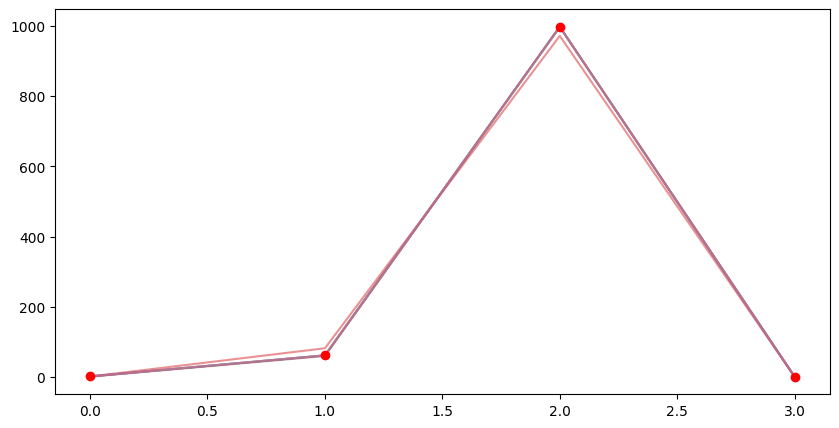

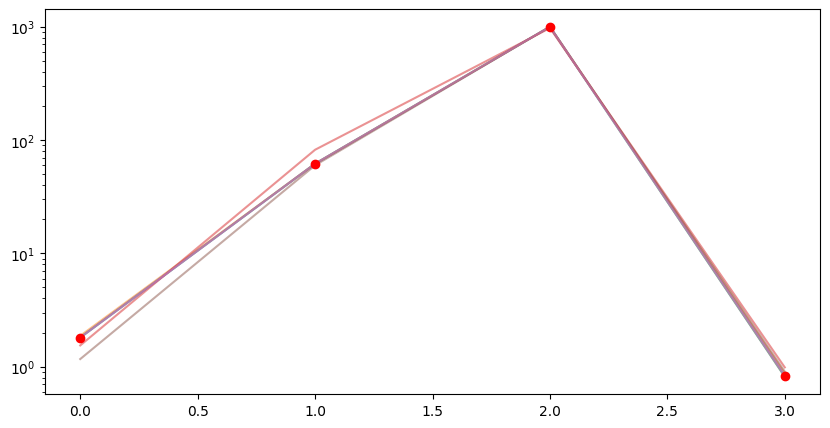

In [16]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

# ut.match_plot(df_model.transpose(),target='GPP')

In [19]:
#plot errors
err=ut.get_error(path_itr, filenames)
print(err)
# ut.plot_err(err)

['2.793388882850204e-6', '0.0008175857380790369', '69.44401228187051', '0.1715723264704097', '1.079087447978125e7', '0.0010083852248775305', '7.0560219909670865', '40508.650435282914', '0.0007053271454708677', '0.007052621552781931']


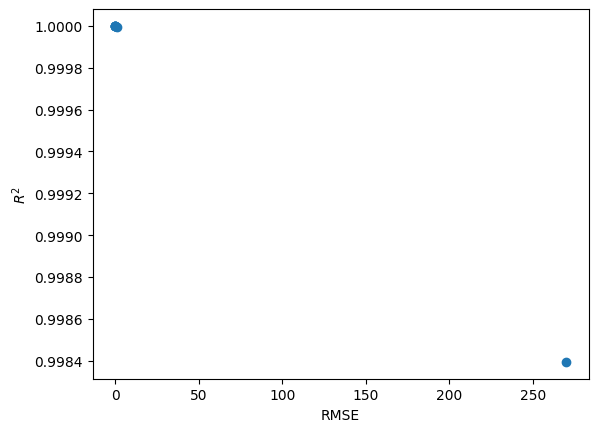

In [18]:
ut.plot_r2_rmse(df_model)

/home/aizax/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


../../dvm-dos-tem/scripts/AC3-STEP1-MD3-CR_IG1.finalresults


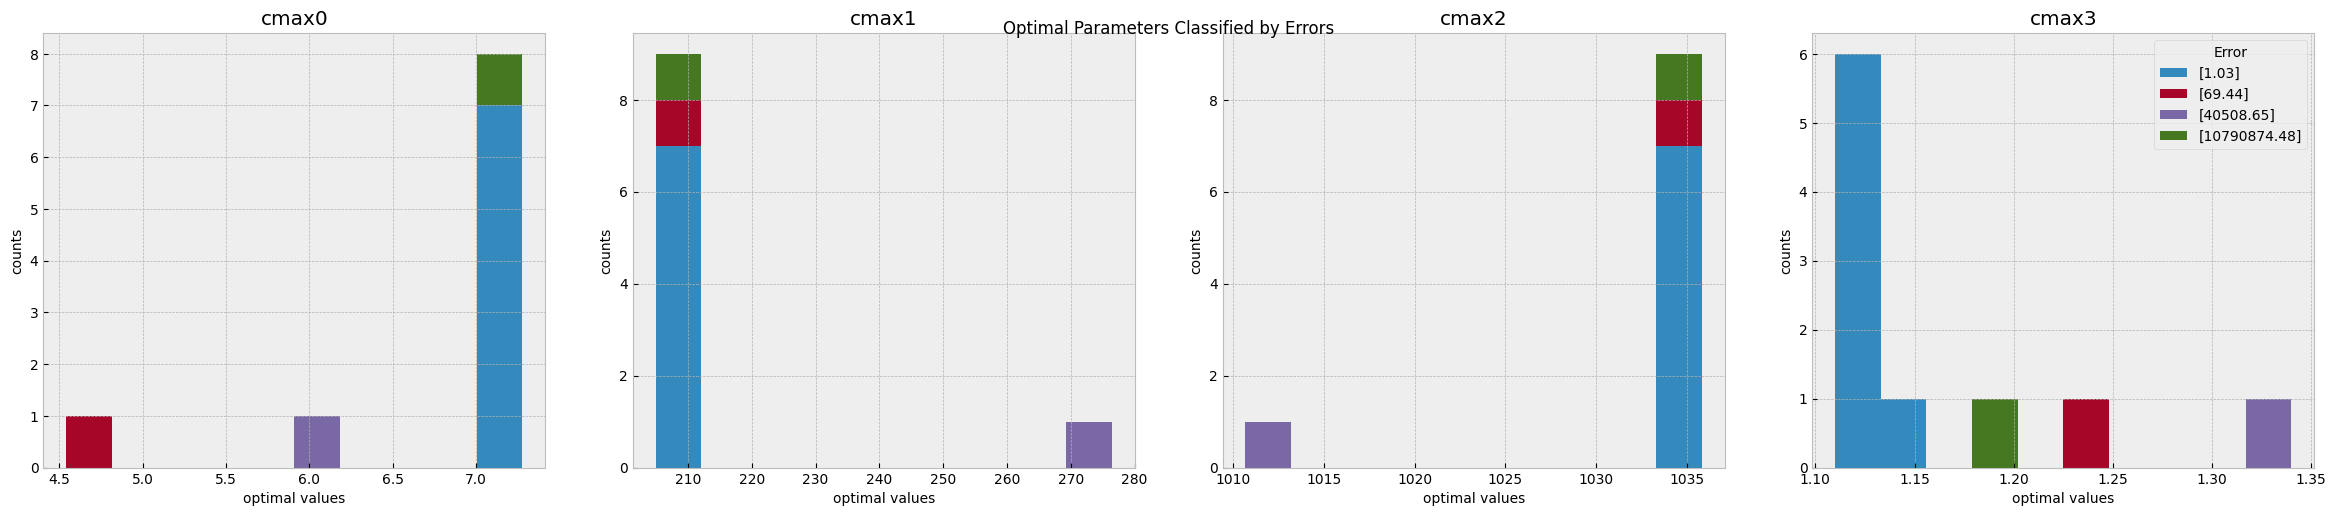

In [20]:
#Get error clusters
float_err=[float(x) for x in err]
rounded_err=list(np.round(float_err,7))
y_kmeans,centers=ut.get_err_clusters(float_err)

# #Organize parameters values by kmeans clusters
ut.plot_stacked_histograms(mparams,centers,y_kmeans,y=26,r=5,c=4,std=0)
import os
for filename in filenames:
    print(os.path.join(path_itr, filename))

# AC3 Step2 - 105 runs total
prior informed initial guess

In [21]:
path='../../dvm-dos-tem/mads_calibration/results/'
path_itr='../../dvm-dos-tem/scripts/'
model='out-AC3-STEP2-MD3.csv'
params='param-AC3-STEP2-MD3.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

In [22]:
filenames = ['AC3-STEP2-MD3_1.finalresults', 'AC3-STEP2-MD3_2.finalresults', 'AC3-STEP2-MD3_3.finalresults',
            'AC3-STEP2-MD3_4.finalresults', 'AC3-STEP2-MD3_5.finalresults', 'AC3-STEP2-MD3_6.finalresults', 
            'AC3-STEP2-MD3_7.finalresults']
targets='NPP/VEGC'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

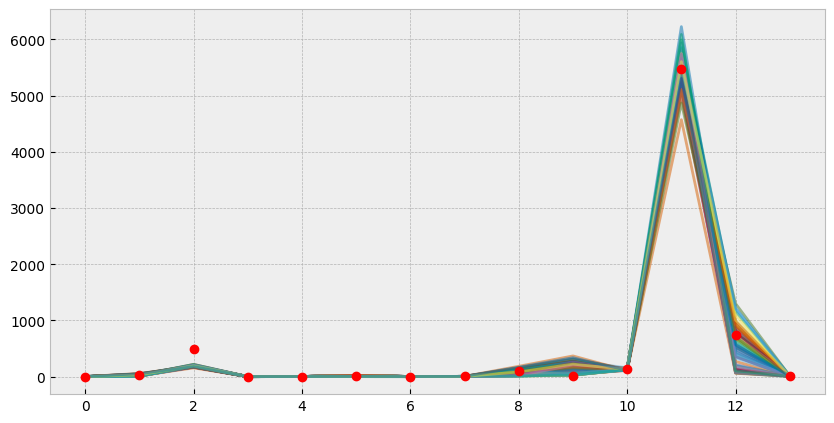

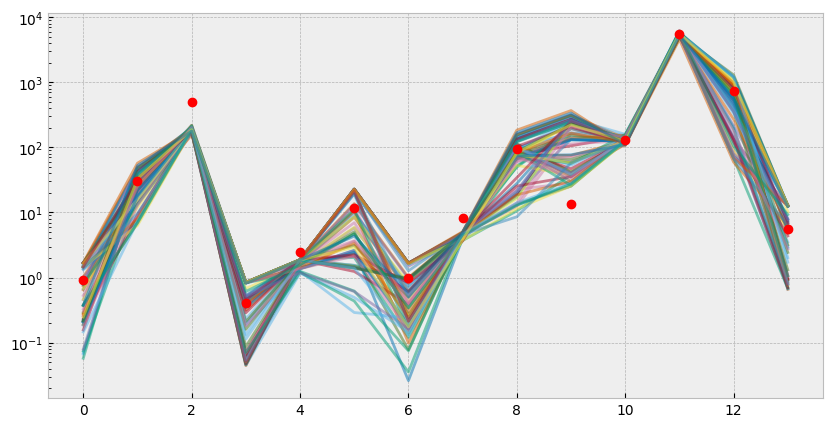

In [23]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

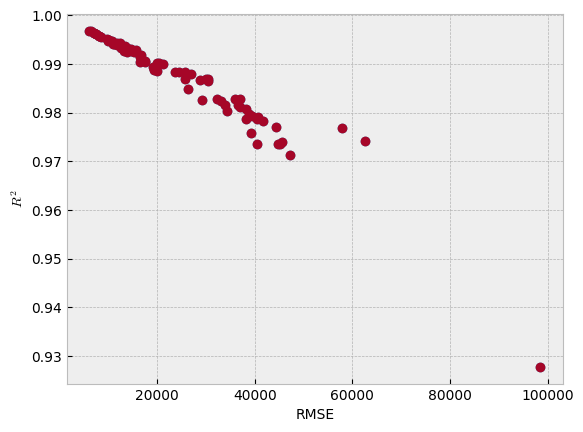

In [27]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)
plt.plot(rmse,r2,'o'), plt.xlabel('RMSE'), plt.ylabel('$R^2$');
ut.plot_r2_rmse(df_model)

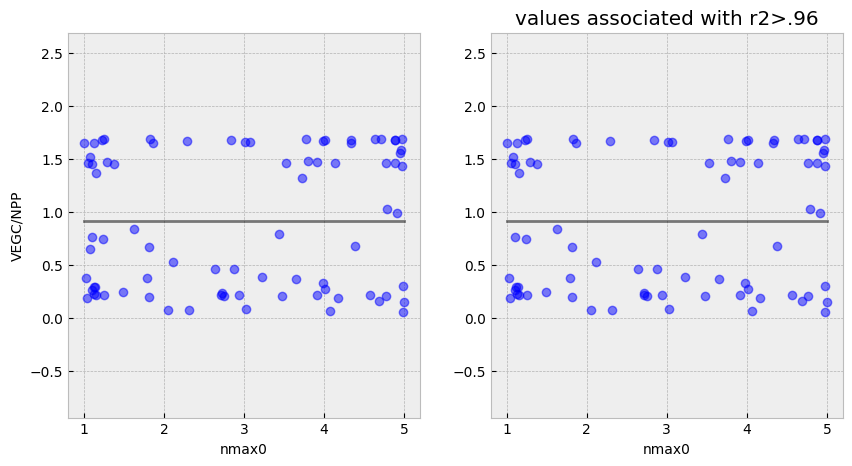

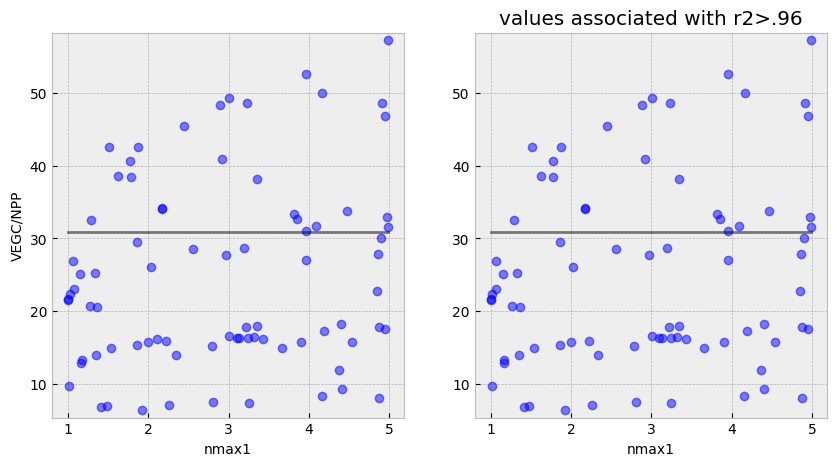

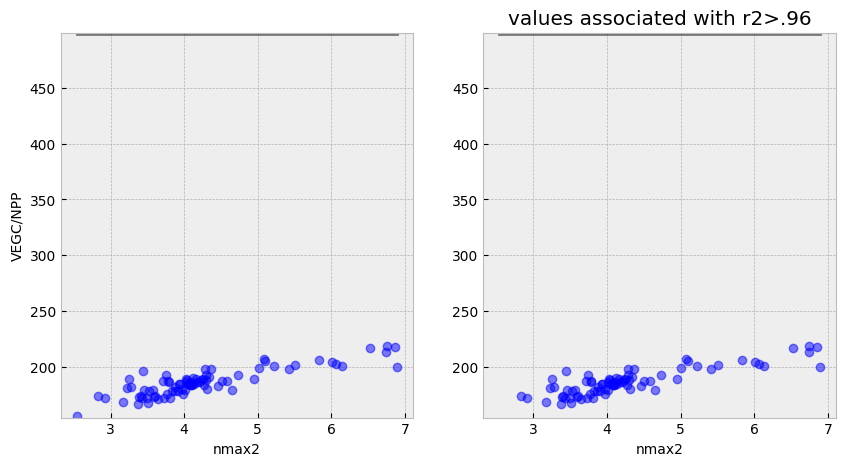

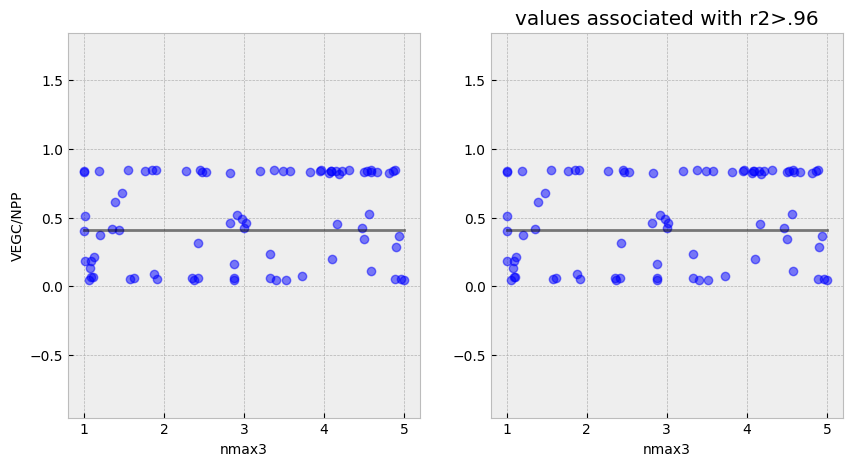

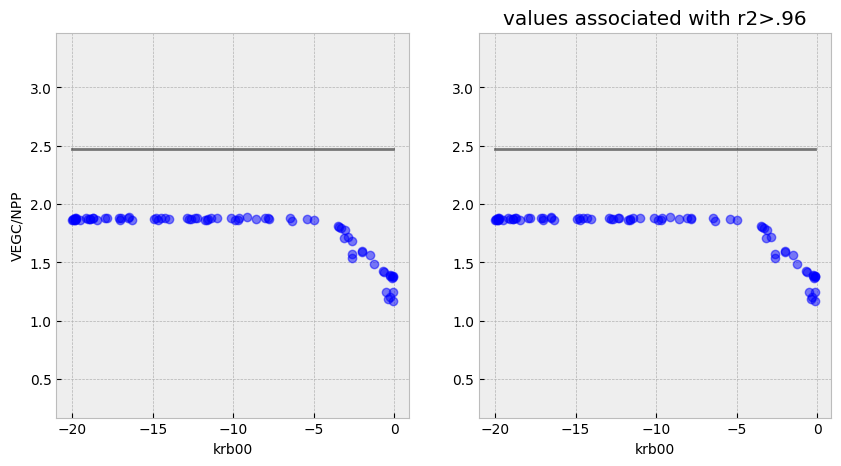

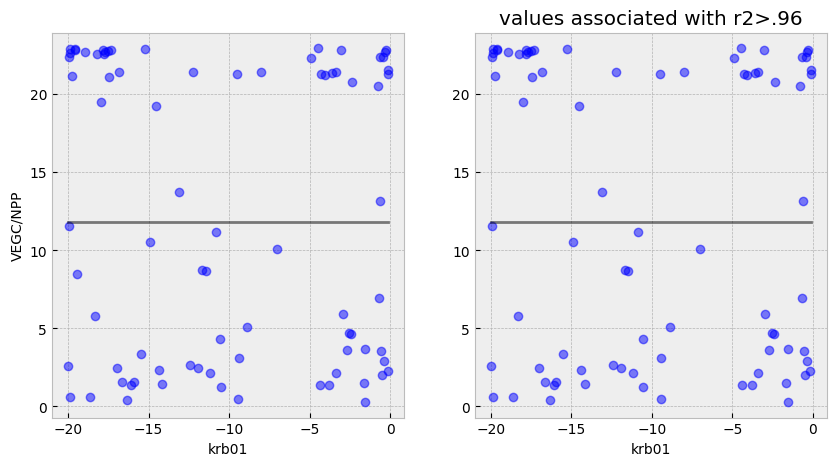

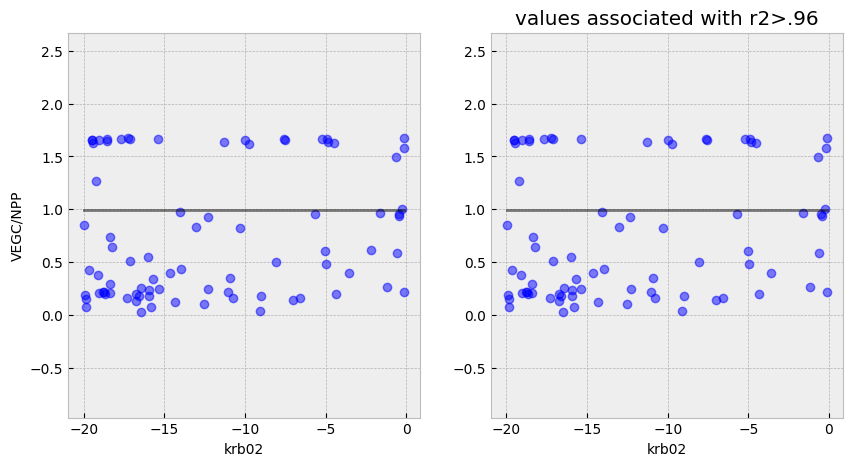

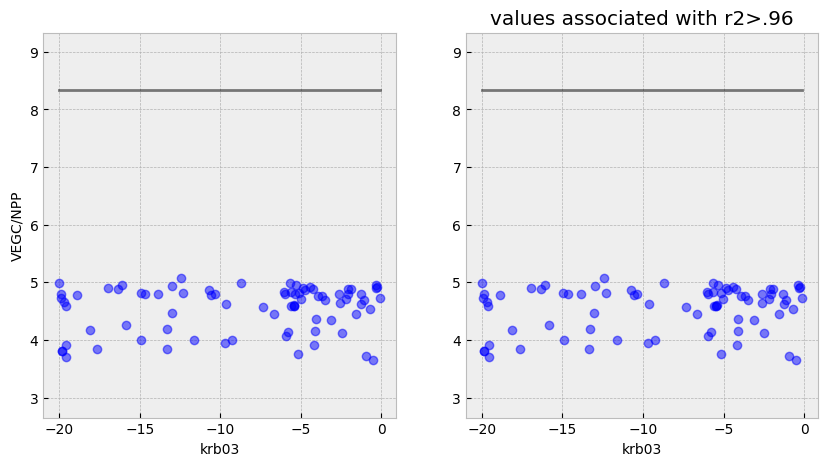

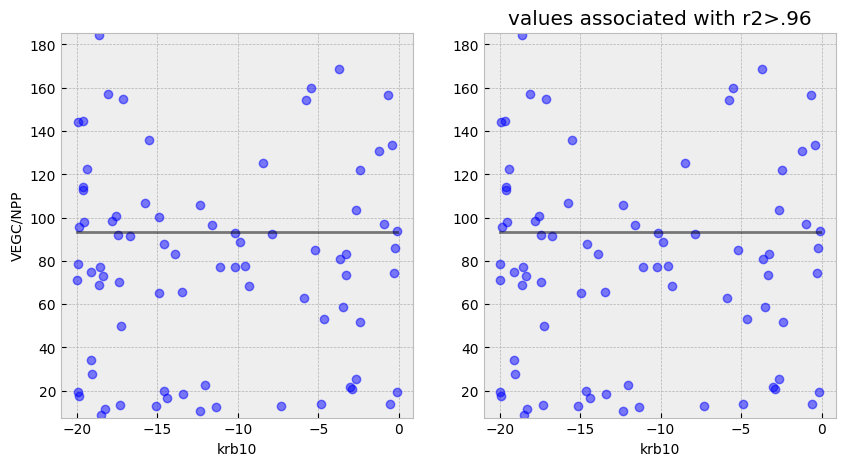

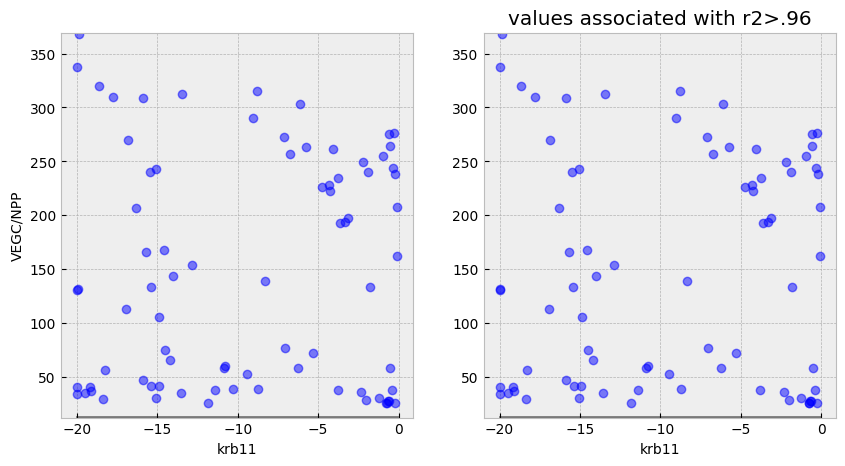

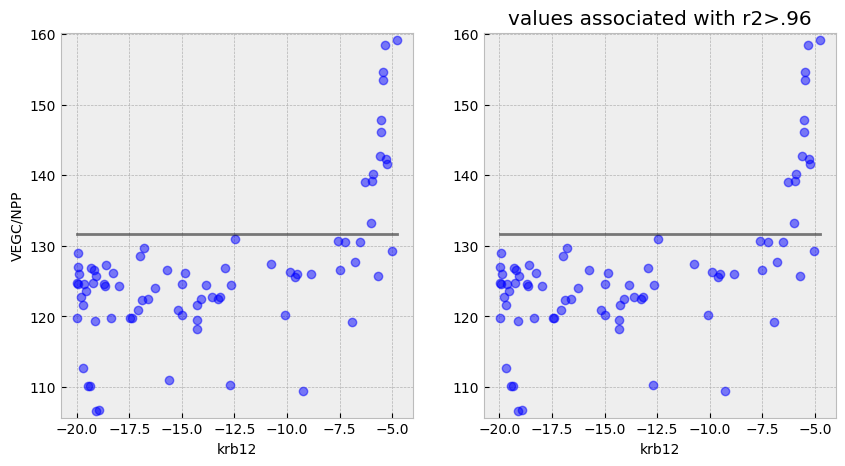

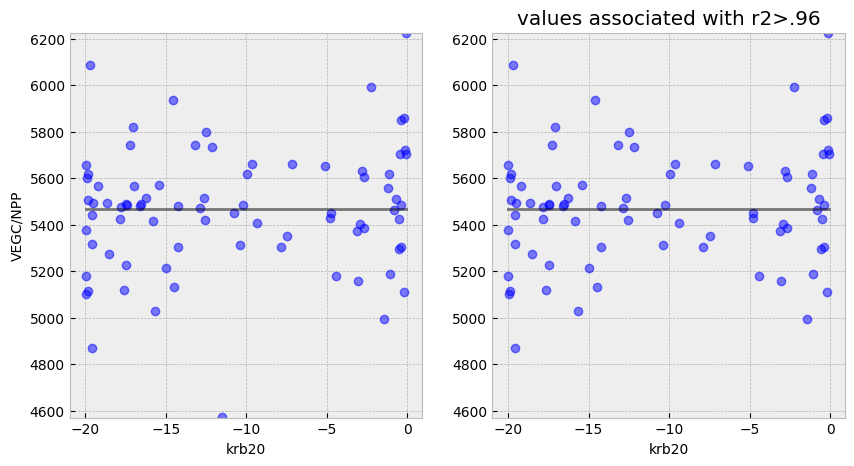

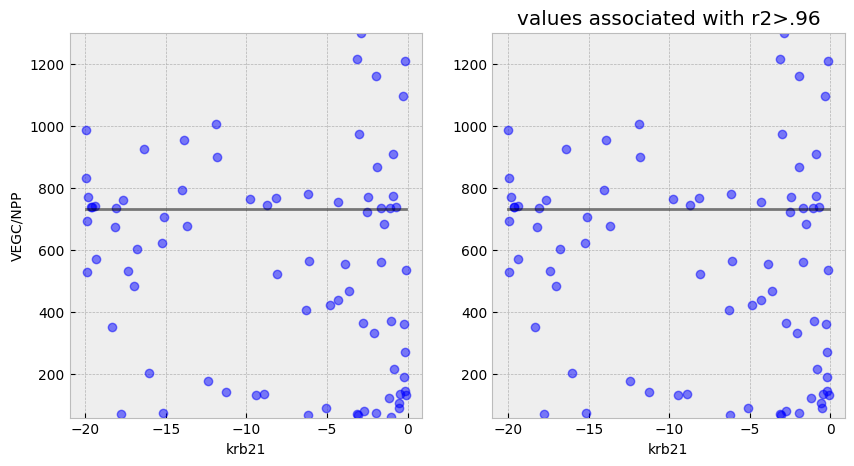

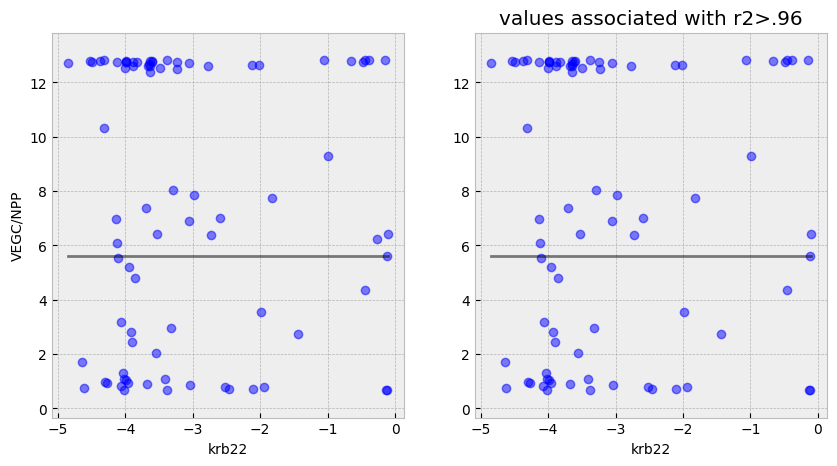

In [28]:
#this assumes a 1-1 relationship between obs and params
i=0
for item in mparams:
    ut.plot_paramsvstarget(df_param,df_model,r2,i,xlabel=item,ylabel='VEGC/NPP')
    i=i+1

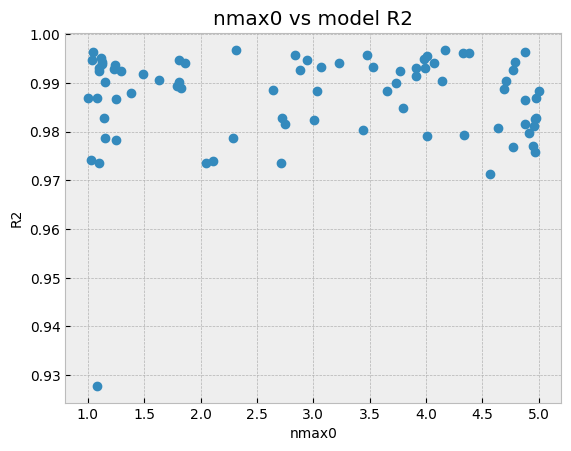

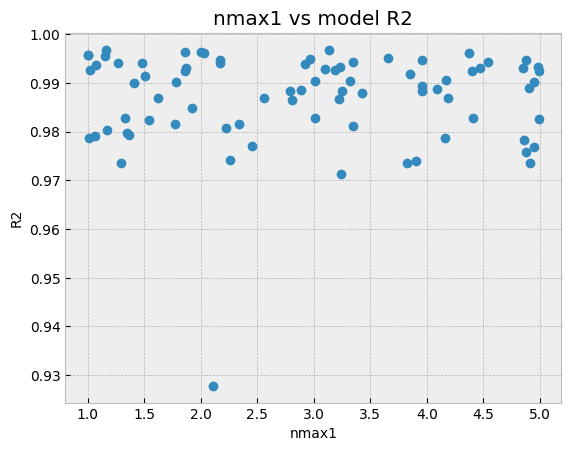

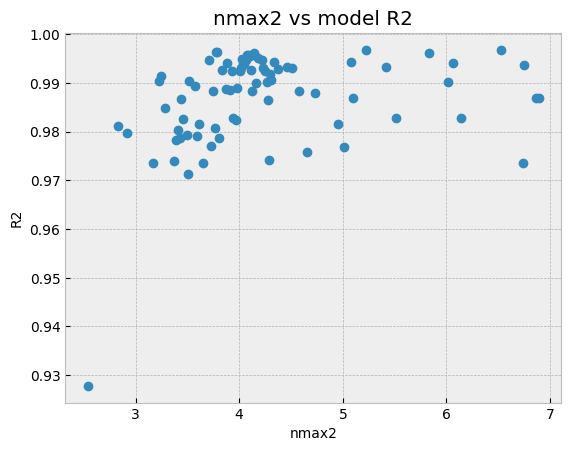

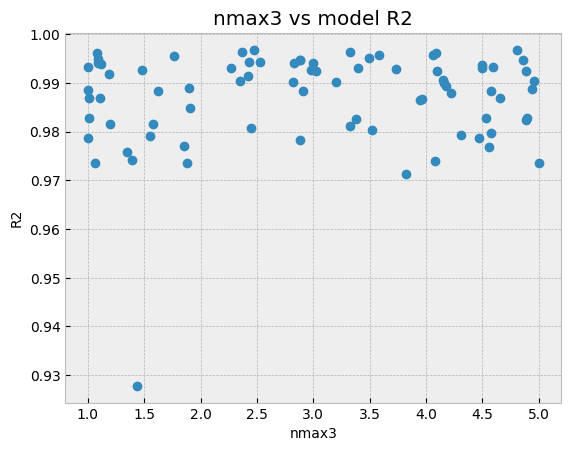

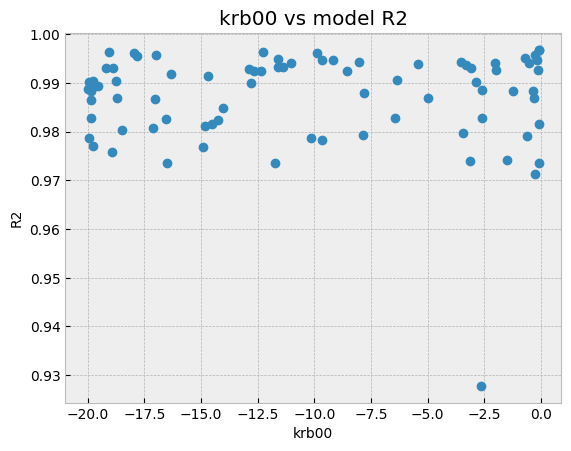

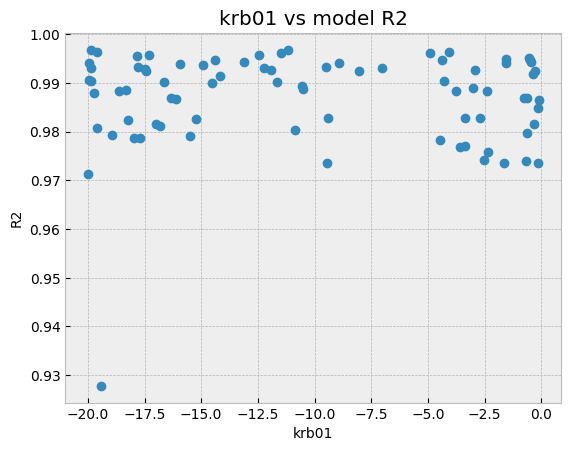

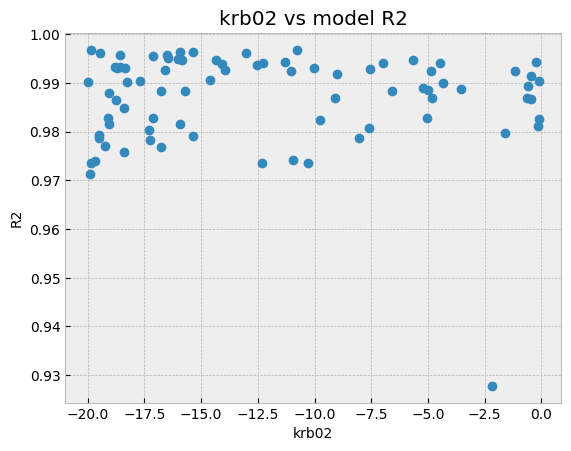

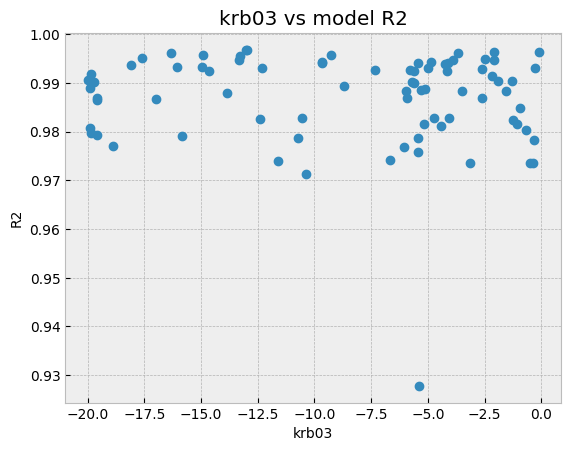

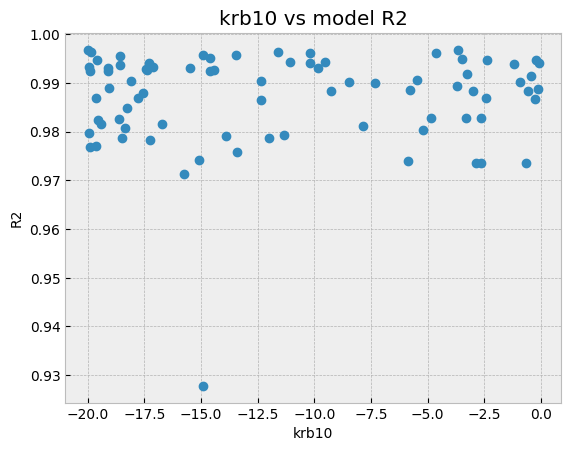

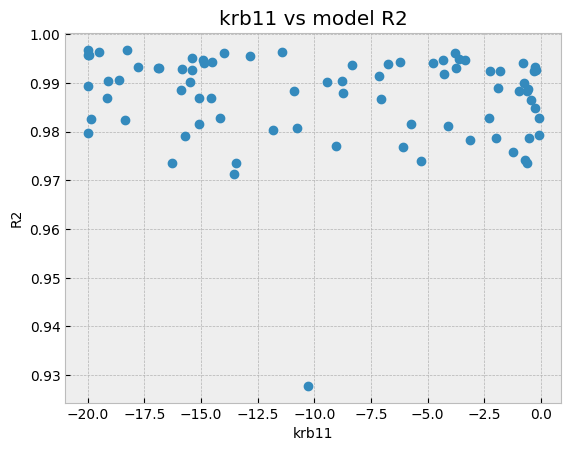

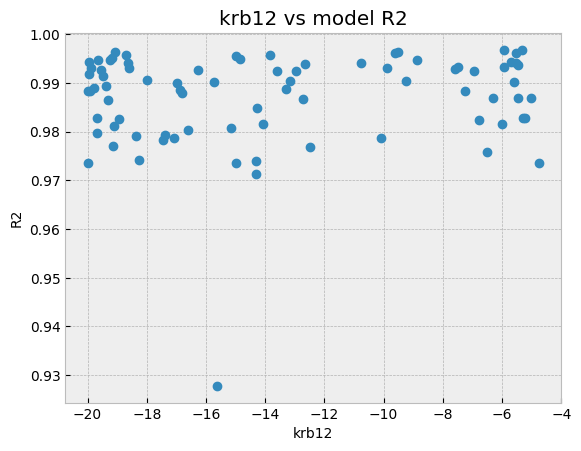

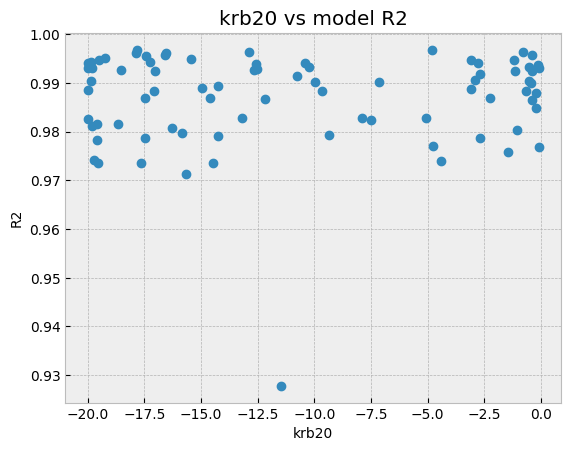

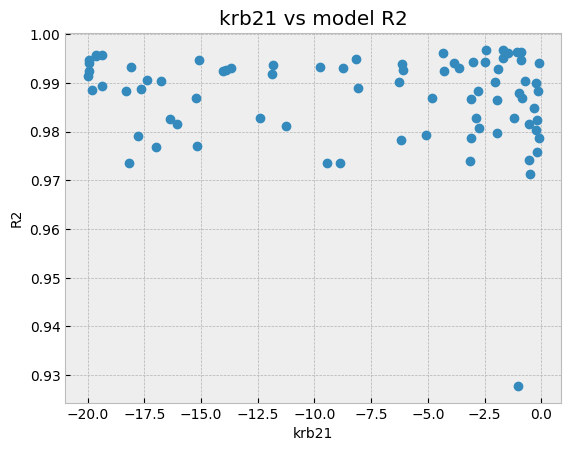

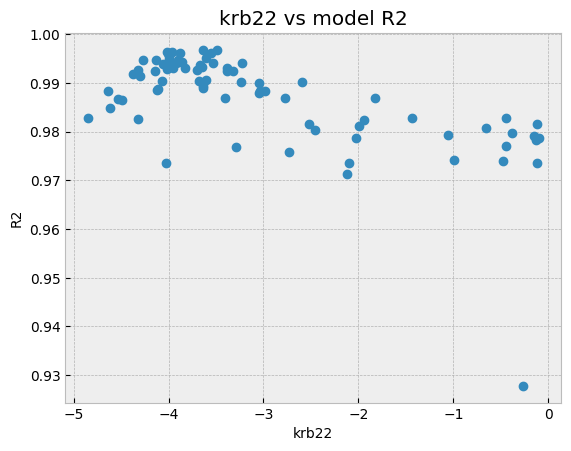

In [29]:
i=0
for item in mparams:
    plt.figure()
    plt.plot(df_param.iloc[:,i],r2,'o');
    plt.xlabel(item), plt.ylabel('R2');
    plt.title(item+' vs model R2')
    i=i+1

In [ ]:
# AC Step3 - comparable to AC3 step 2
#Could not generate the out file correctly??
# path='../../dvm-dos-tem/mads_calibration/'
# model='out_AC-STEP3-MD3_CR_forcedist.csv'
# params='param_AC-STEP3-MD3_CR_forcedist.csv'
# df_model = pd.read_csv(path+model,header=None)
# df_param = pd.read_csv(path+params,header=None)

filenames = ['STEP3-MD3_CR_forcedist.finalresults', 'STEP3-MD3_CR_forcedist2.finalresults', 
      'STEP3-MD3_CR_forcedist3.finalresults', 'STEP3-MD3_CR_forcedist4.finalresults',
             'STEP3-MD3_CR_forcedist5.finalresults', 'STEP3-MD3_CR_forcedist6.finalresults']
targets='NPP/VEGC'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

# AC-MADS Step2 - no prior

In [30]:
path='../../dvm-dos-tem/mads_calibration/results/'
path_itr='../../dvm-dos-tem/mads_calibration/'
model='out_STEP2-MD3-CR-noprior.csv'
params='param_STEP2-MD3-CR-noprior.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

filenames = ['STEP2-MD3-CR-noprior.finalresults', 'STEP2-MD3-CR-noprior_2.finalresults', 'STEP2-MD3-CR-noprior_3.finalresults',
      'STEP2-MD3-CR-noprior_4.finalresults']
targets='NPP/VEGC/VEGN'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

In [31]:
mparams=ut.get_optimal_sets_of_params(path_itr+filenames[0]) 
for i in filenames[1:]:
    mparams = ut.merge_parameter(mparams, ut.get_optimal_sets_of_params(path_itr+i))

['3.0084071769907894e9', '5.117590989188484e9', '7.701610818594249e9', '2.9200150515013757e9', '4.036914484677113e9', '3.8421883154820595e9', '1.5104039518891714e9', '2.994384639861488e9', '1.0767210013236706e9', '4.373775132446365e9', '1.3827351808848991e10', '3.632496778590681e9', '1.825583634110823e9', '1.7942857957271342e9', '1.4531217189743454e9', '4.1472852474612784e9', '1.208259727258036e10', '5.944714719475805e9', '4.1205666366453376e9', '1.8796114901932762e10', '3.093135562703902e9', '2.5412686589183945e10', '4.882713088350221e9', '5.701257920820839e9', '1.2838084914062722e9', '5.670085305858423e9', '5.952788964262233e9', '1.070517897770958e9']


/home/aizax/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/aizax/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


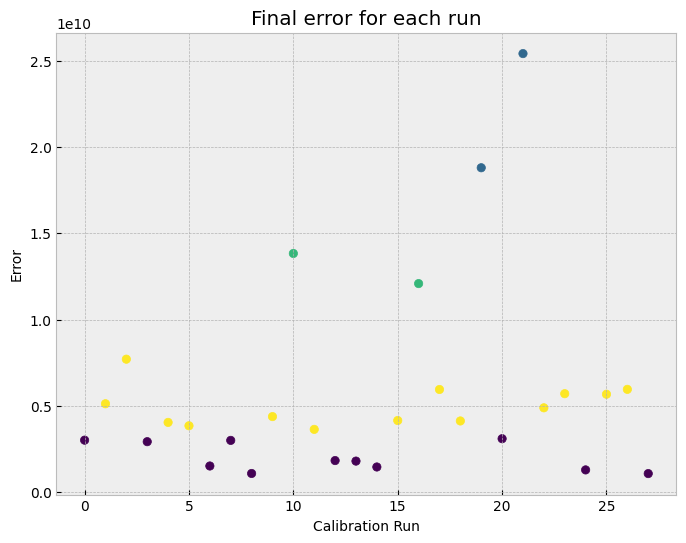

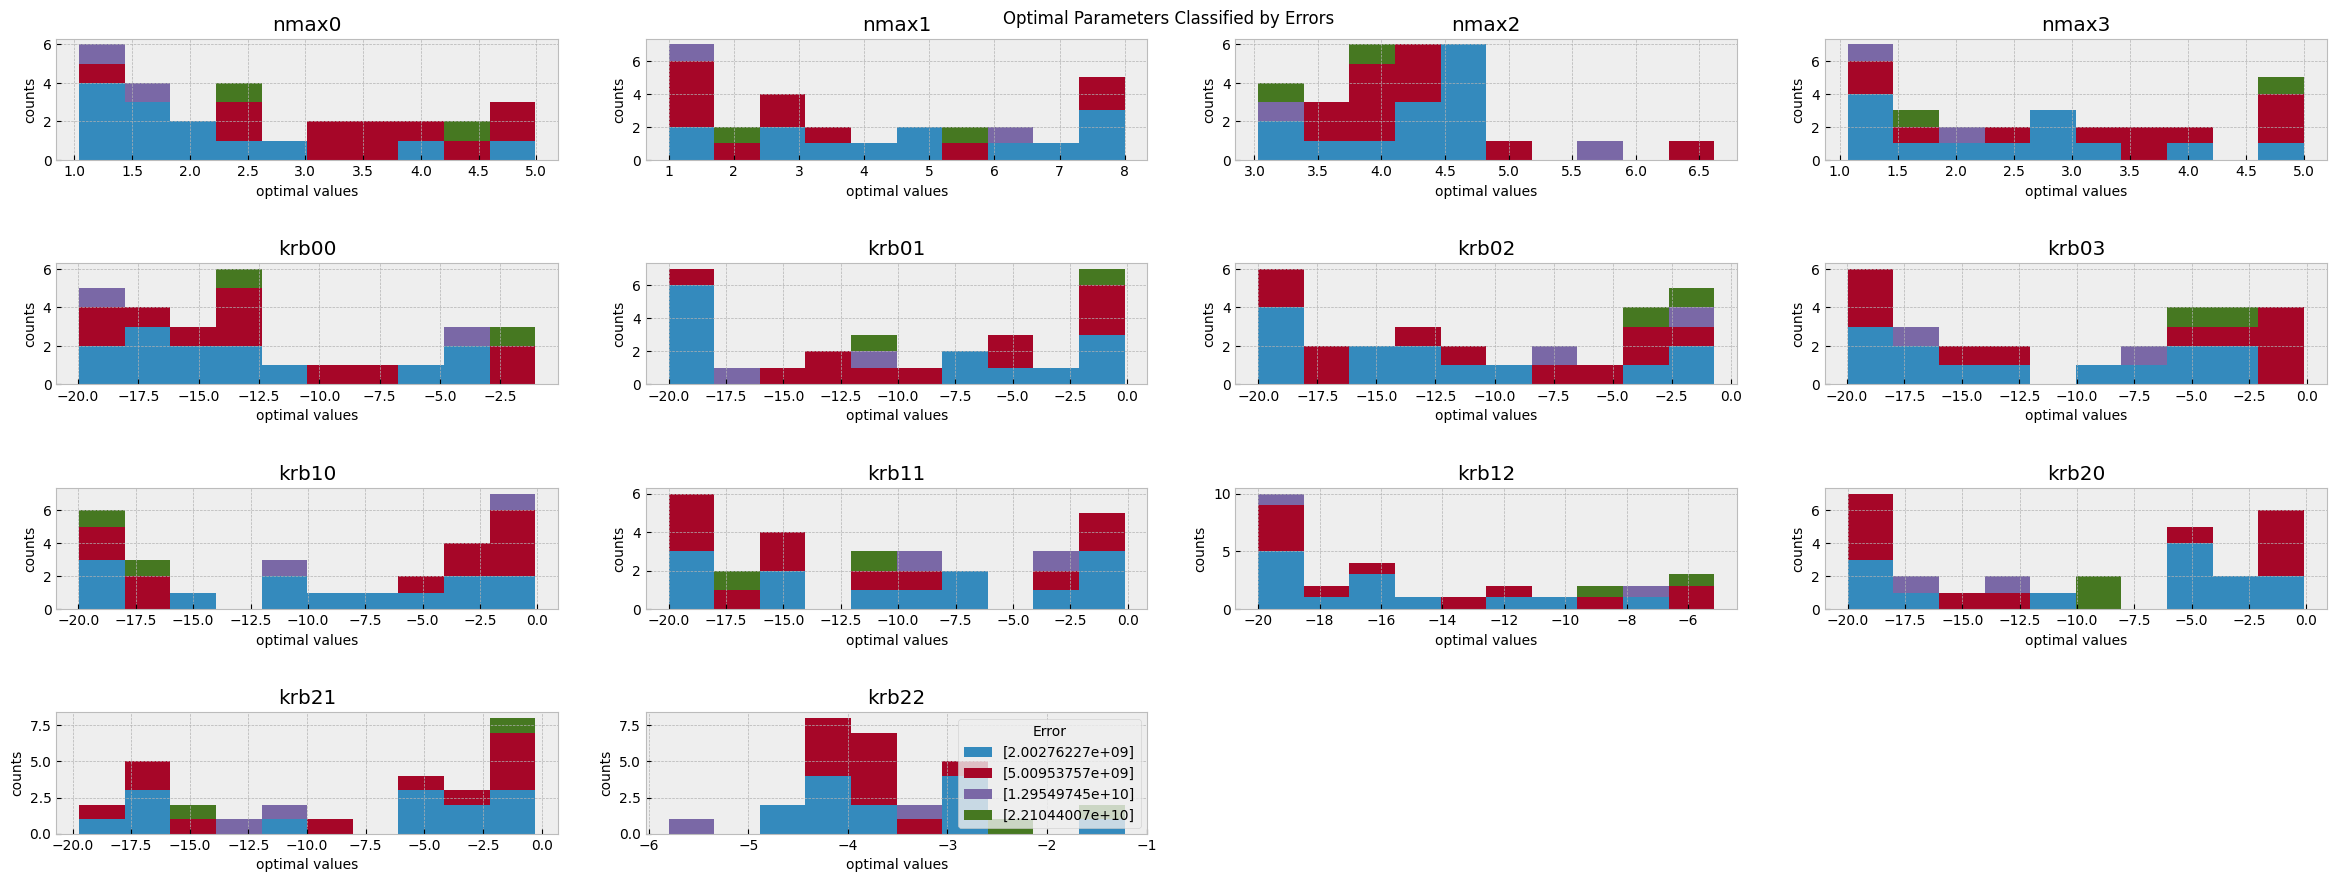

In [32]:
#plot errors
err=ut.get_error(path_itr, filenames)
print(err)
ut.plot_err(err)

#Get error clusters 
float_err=[float(x) for x in err]
rounded_err=list(np.round(float_err,7))
y_kmeans,centers=ut.get_err_clusters(float_err)

#Organize parameters values by kmeans clusters
ut.plot_stacked_histograms(mparams,centers, y_kmeans, r=8, y=18, nbins=10, std=0)

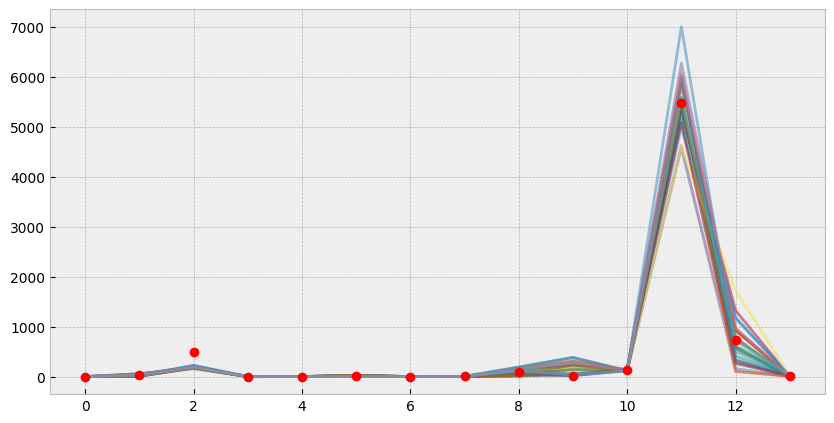

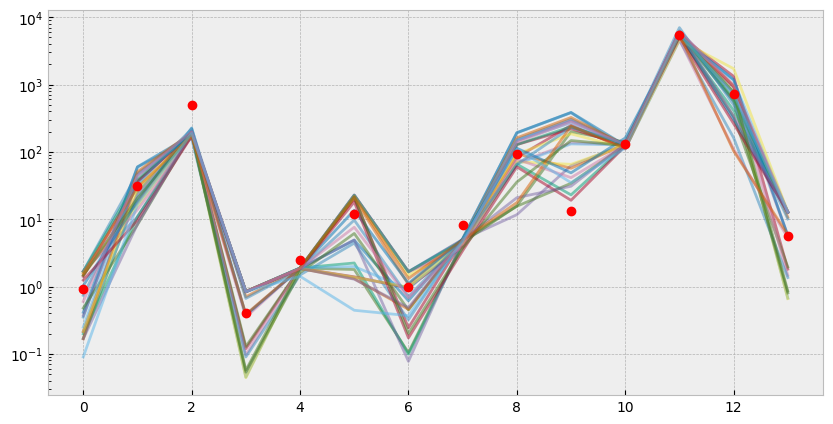

In [33]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

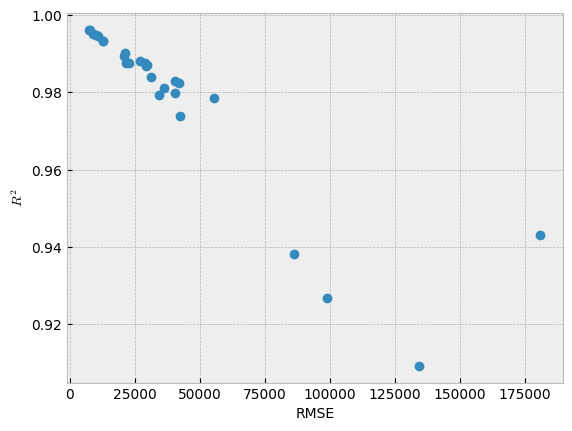

In [34]:
ut.plot_r2_rmse(df_model)

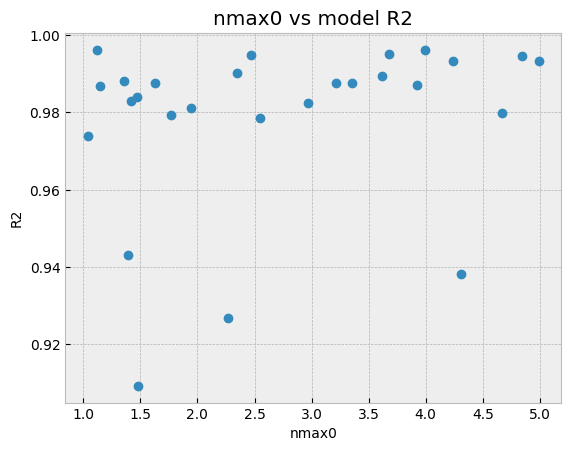

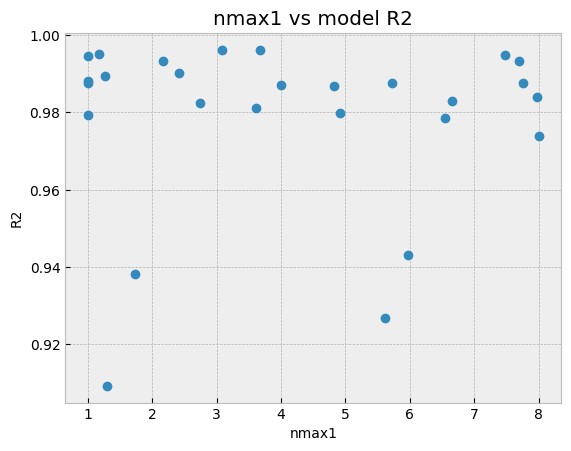

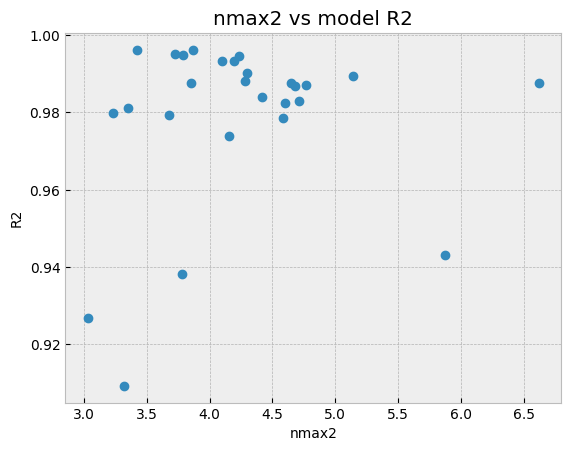

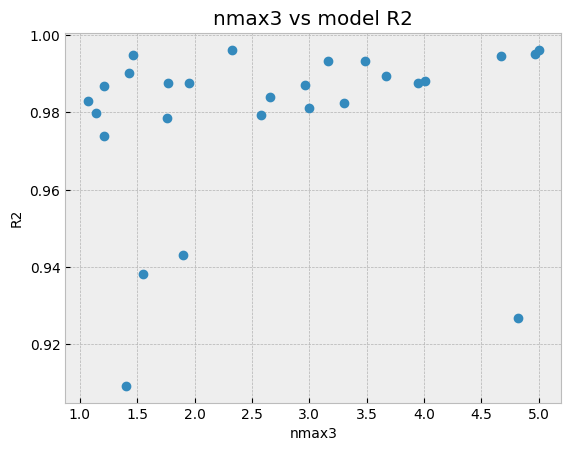

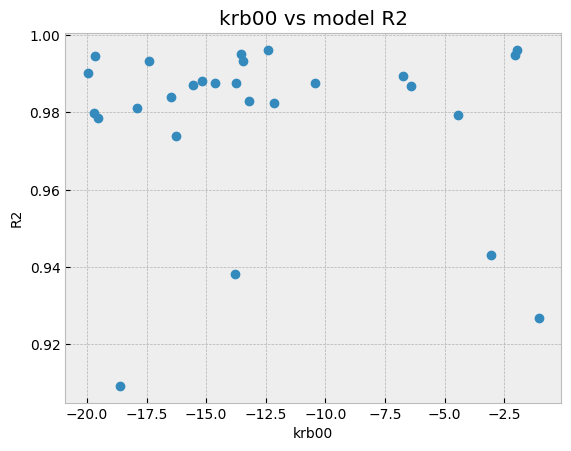

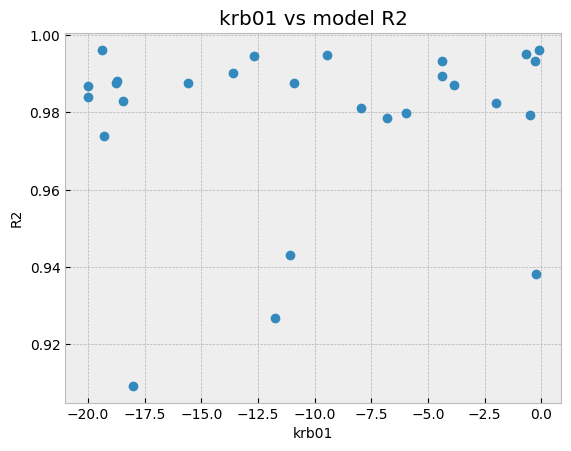

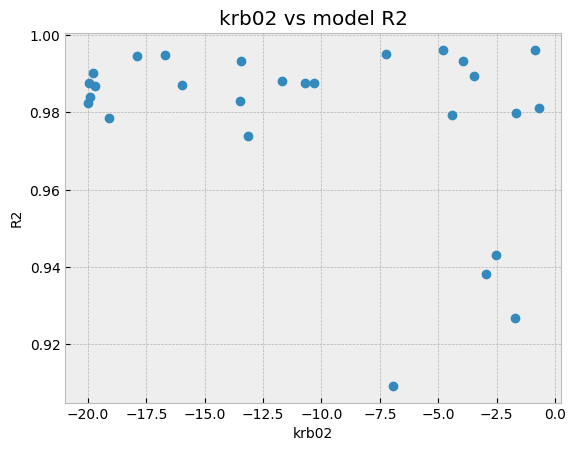

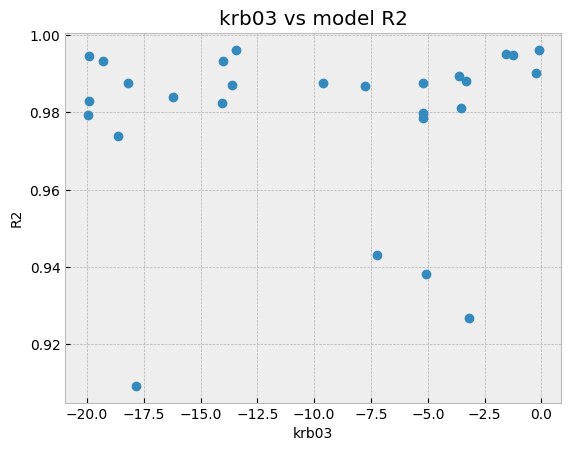

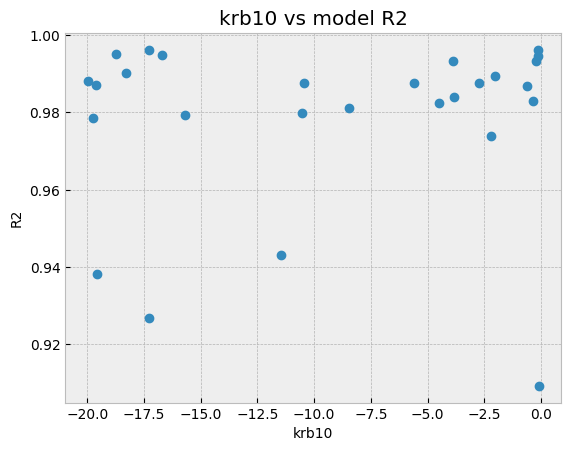

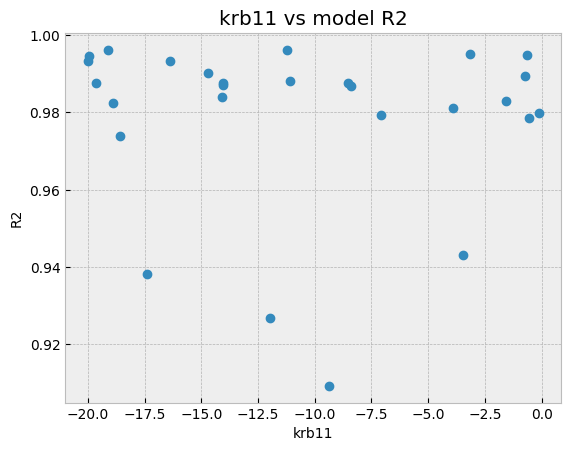

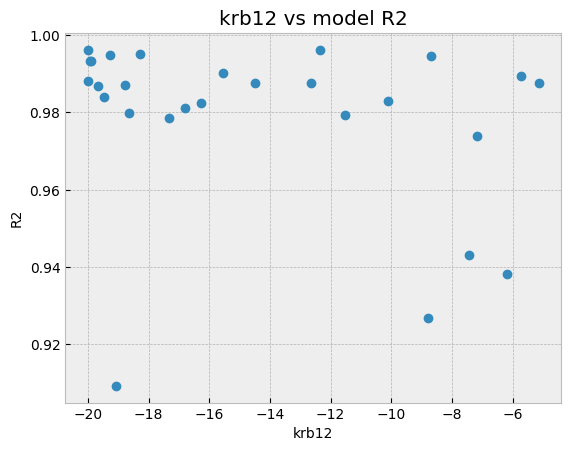

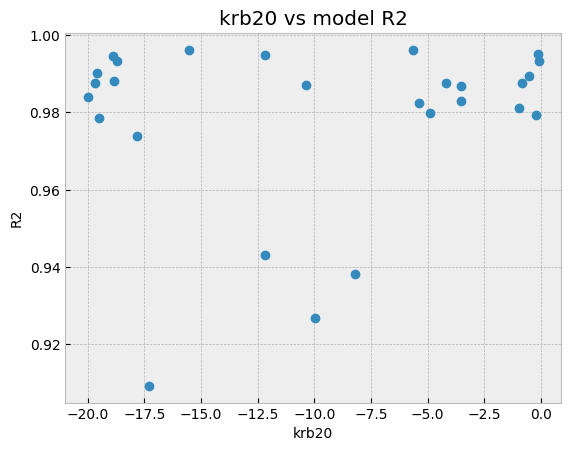

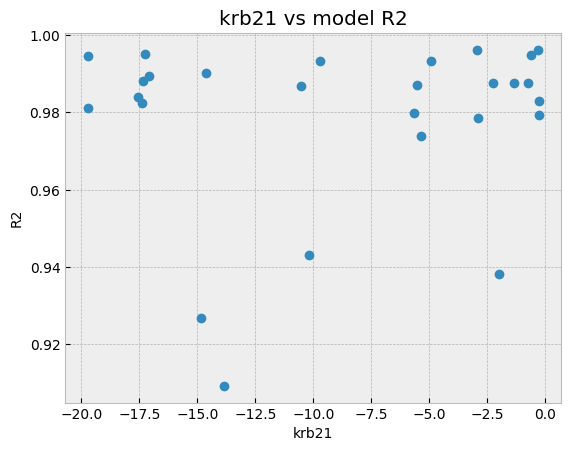

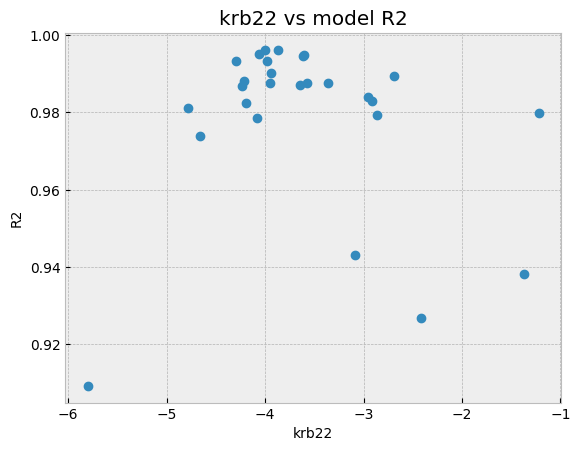

In [35]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)

i=0
for item in mparams:
    plt.figure()
    plt.plot(df_param.iloc[:,i],r2,'o');
    plt.xlabel(item), plt.ylabel('R2');
    plt.title(item+' vs model R2')
    i=i+1

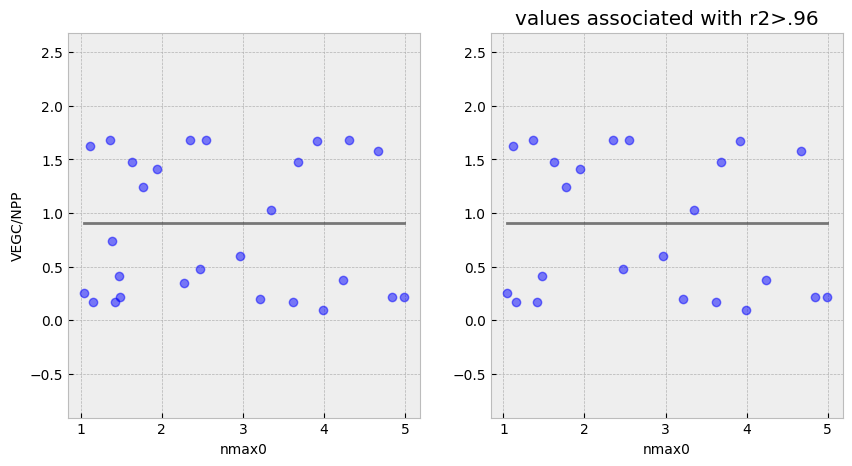

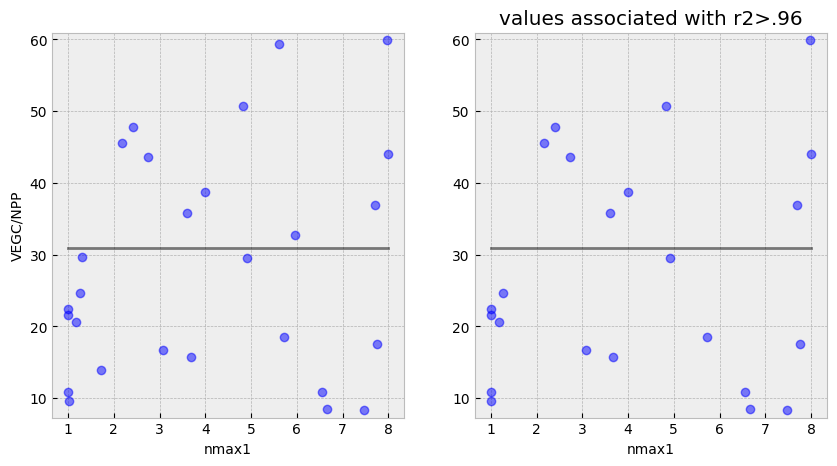

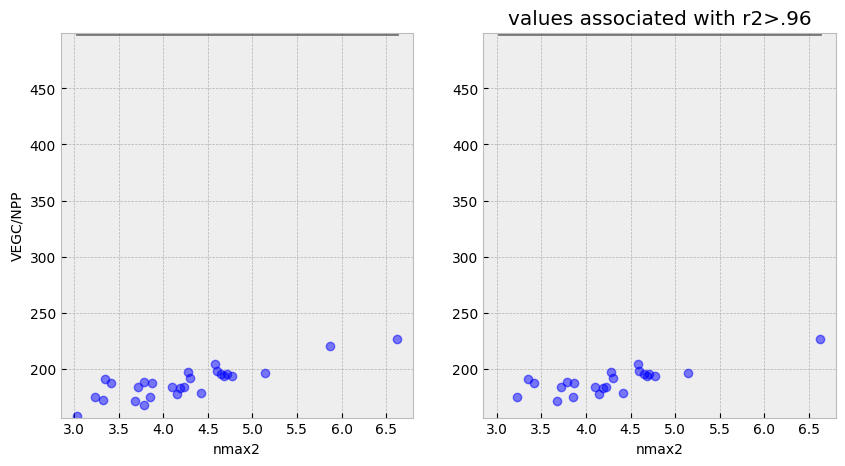

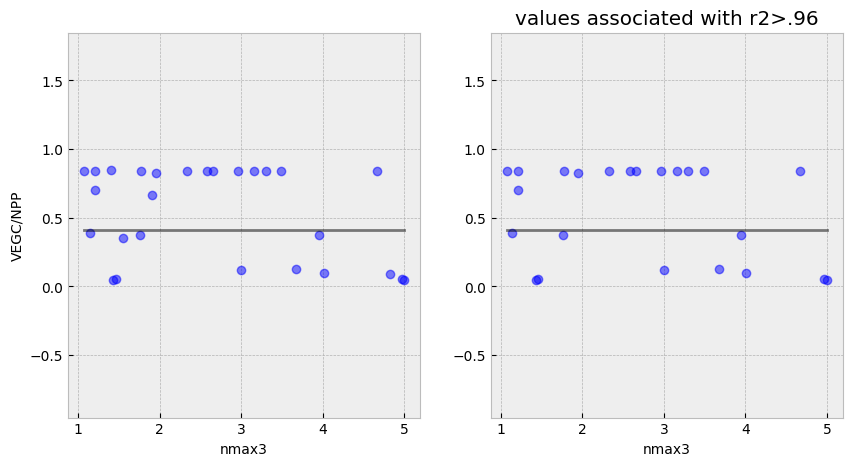

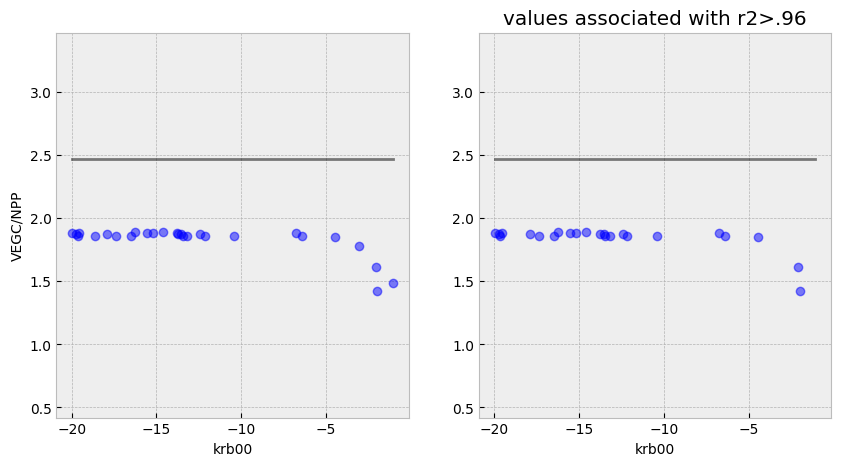

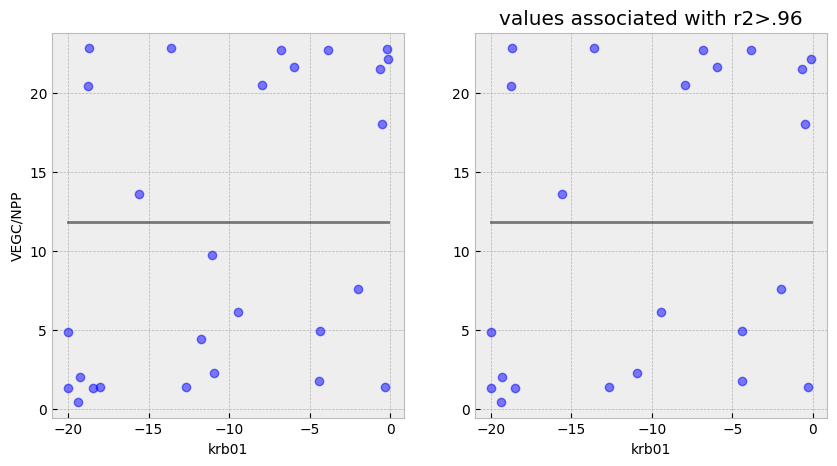

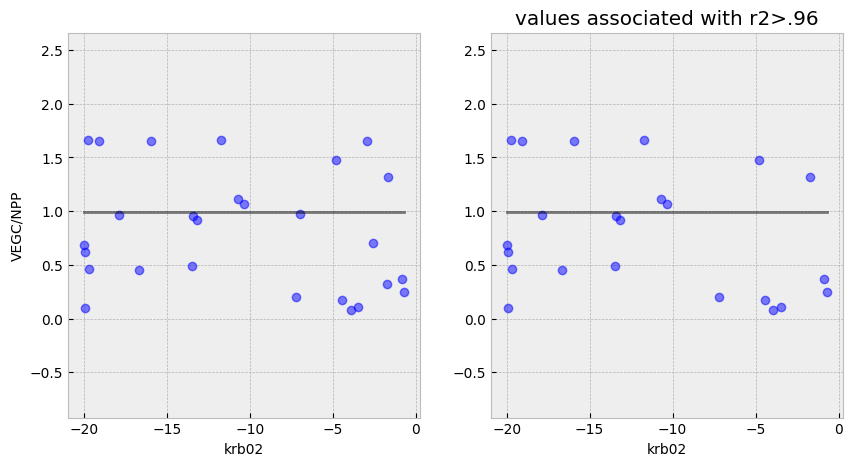

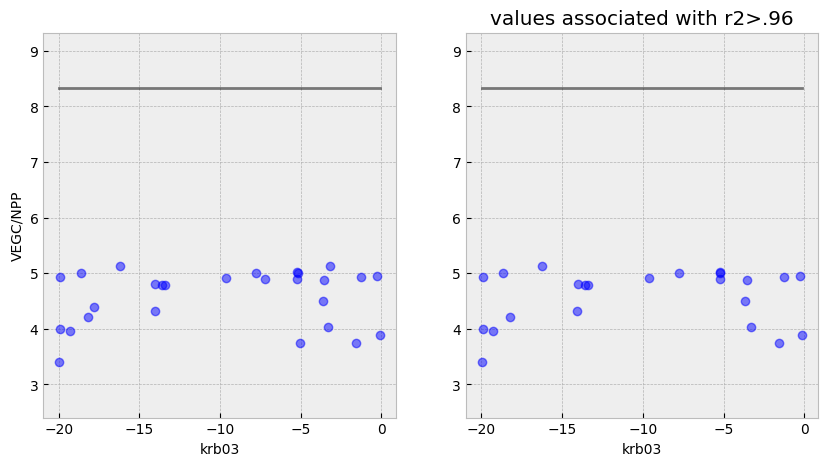

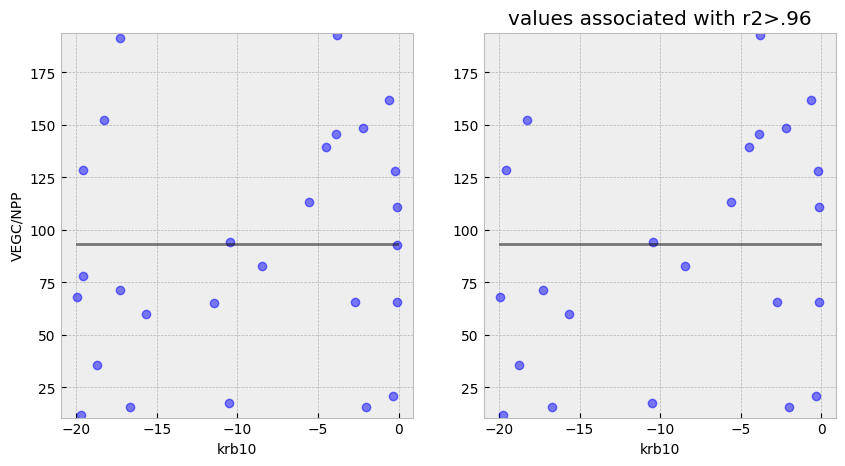

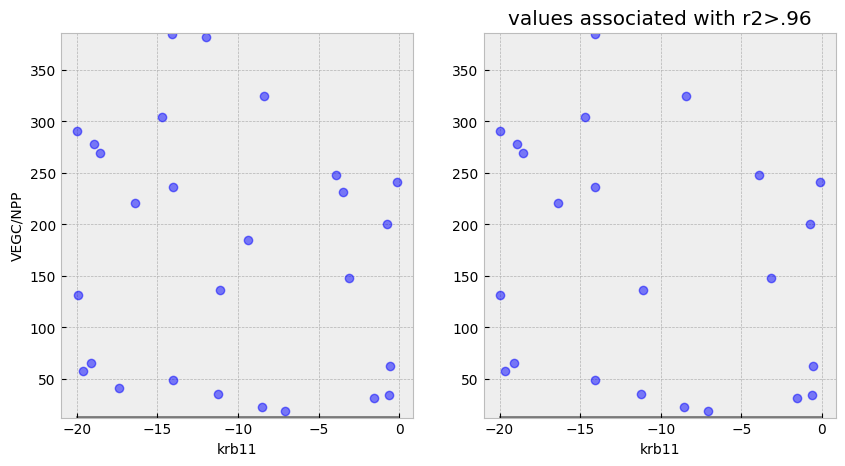

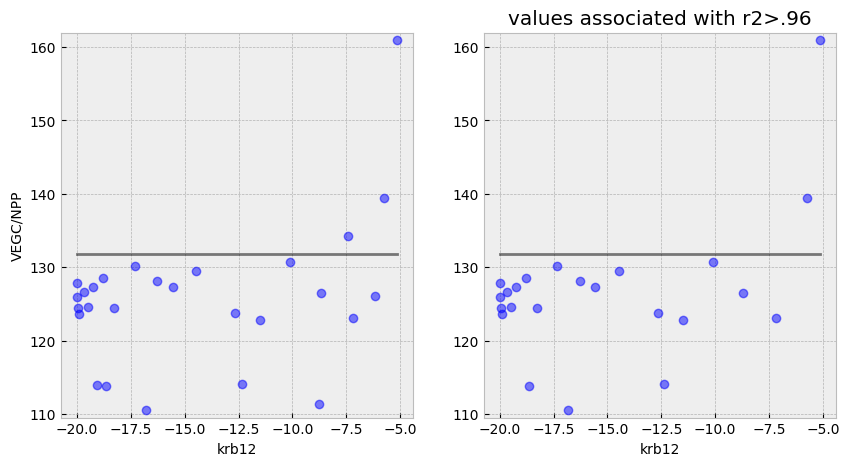

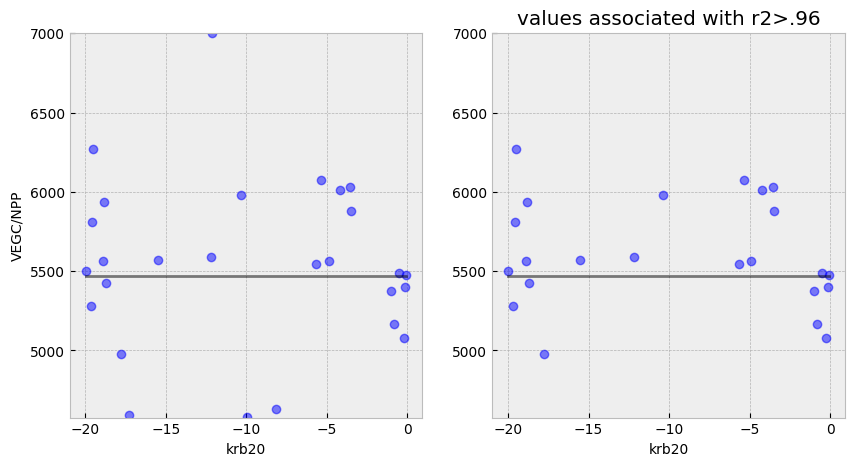

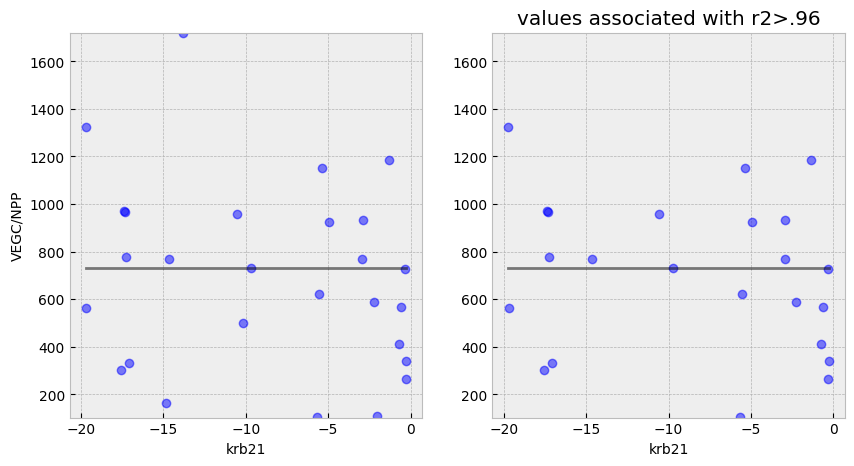

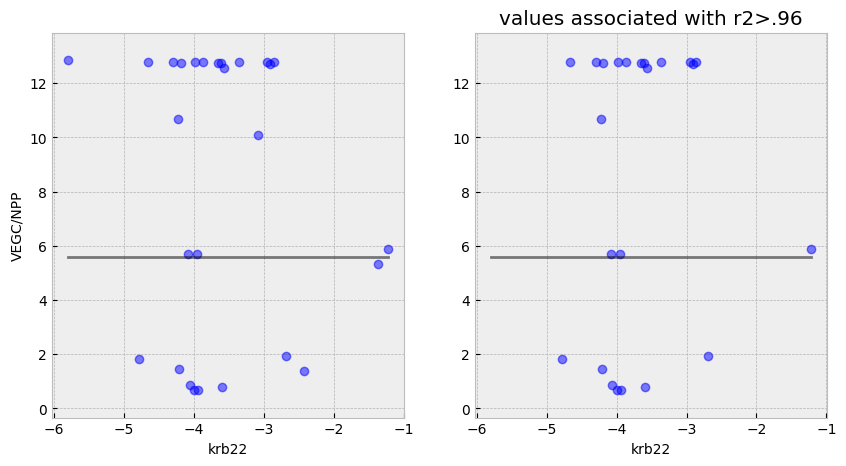

In [36]:
#this assumes a 1-1 relationship between obs and params
i=0
for item in mparams:
    ut.plot_paramsvstarget(df_param,df_model,r2,i,xlabel=item,ylabel='VEGC/NPP')
    i=i+1

# AC-MADS Step3 - no prior for initial guess

In [37]:
path='../../dvm-dos-tem/mads_calibration/results/'
path_itr='../../dvm-dos-tem/mads_calibration/'
model='out_STEP3-MD3-CR-noprior.csv'
params='param_STEP3-MD3-CR-noprior.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

filenames = ['STEP3-MD3-CR-noprior_1.finalresults', 'STEP3-MD3-CR-noprior_2.finalresults', 'STEP3-MD3-CR-noprior_3.finalresults',
      'STEP3-MD3-CR-noprior_4.finalresults', 'STEP3-MD3-CR-noprior_5.finalresults', 'STEP3-MD3-CR-noprior_6.finalresults',
      'STEP3-MD3-CR-noprior_7.finalresults']
targets='NPP/VEGC/VEGN'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

In [38]:
mparams=ut.get_optimal_sets_of_params(path_itr+filenames[0]) 
for i in filenames[1:]:
    mparams = ut.merge_parameter(mparams, ut.get_optimal_sets_of_params(path_itr+i))

['1.6466577157668924e10', '3.69788792944791e10', '4.4133740424830475e9', '4.476222654664731e9', '9.295524214217215e9', '2.903047292676514e9', '7.588190246544192e9', '4.770065319015016e9', '2.554437580175758e10', '1.1242795083269922e10', '6.475838037784684e9', '3.2064837501824727e9', '1.6335128387299234e10', '3.8965544289540668e9', '1.601238027738714e10', '8.589779212668712e9', '1.8932057284206011e9', '2.649191699822669e10', '2.2067188043103745e10', '4.2725071917877774e9', '2.49181084106985e10', '3.0245303454003414e10', '8.135724678679095e9', '2.734783947021159e9', '2.8464862135973134e9', '1.22793086212523e10', '4.930145491262282e9', '6.842709392552009e9', '9.298569306965056e10', '7.8540790388691025e9', '8.427063202303281e9', '7.970167385926865e9', '1.642440009853605e10', '1.0603465618861303e8', '1.3053753674975862e8', '7.253493346589989e9', '1.361636062164636e10', '1.917386459944789e10', '5.258262419697375e9', '2.2057452690774952e10', '7.6830172685855875e9', '5.740341450825839e9', '8.9

/home/aizax/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/aizax/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: num must be an integer with 1 <= num <= 32, not 33

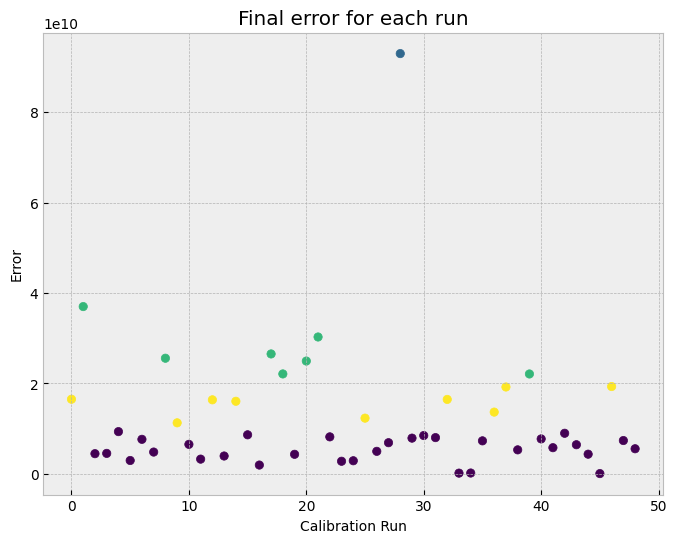

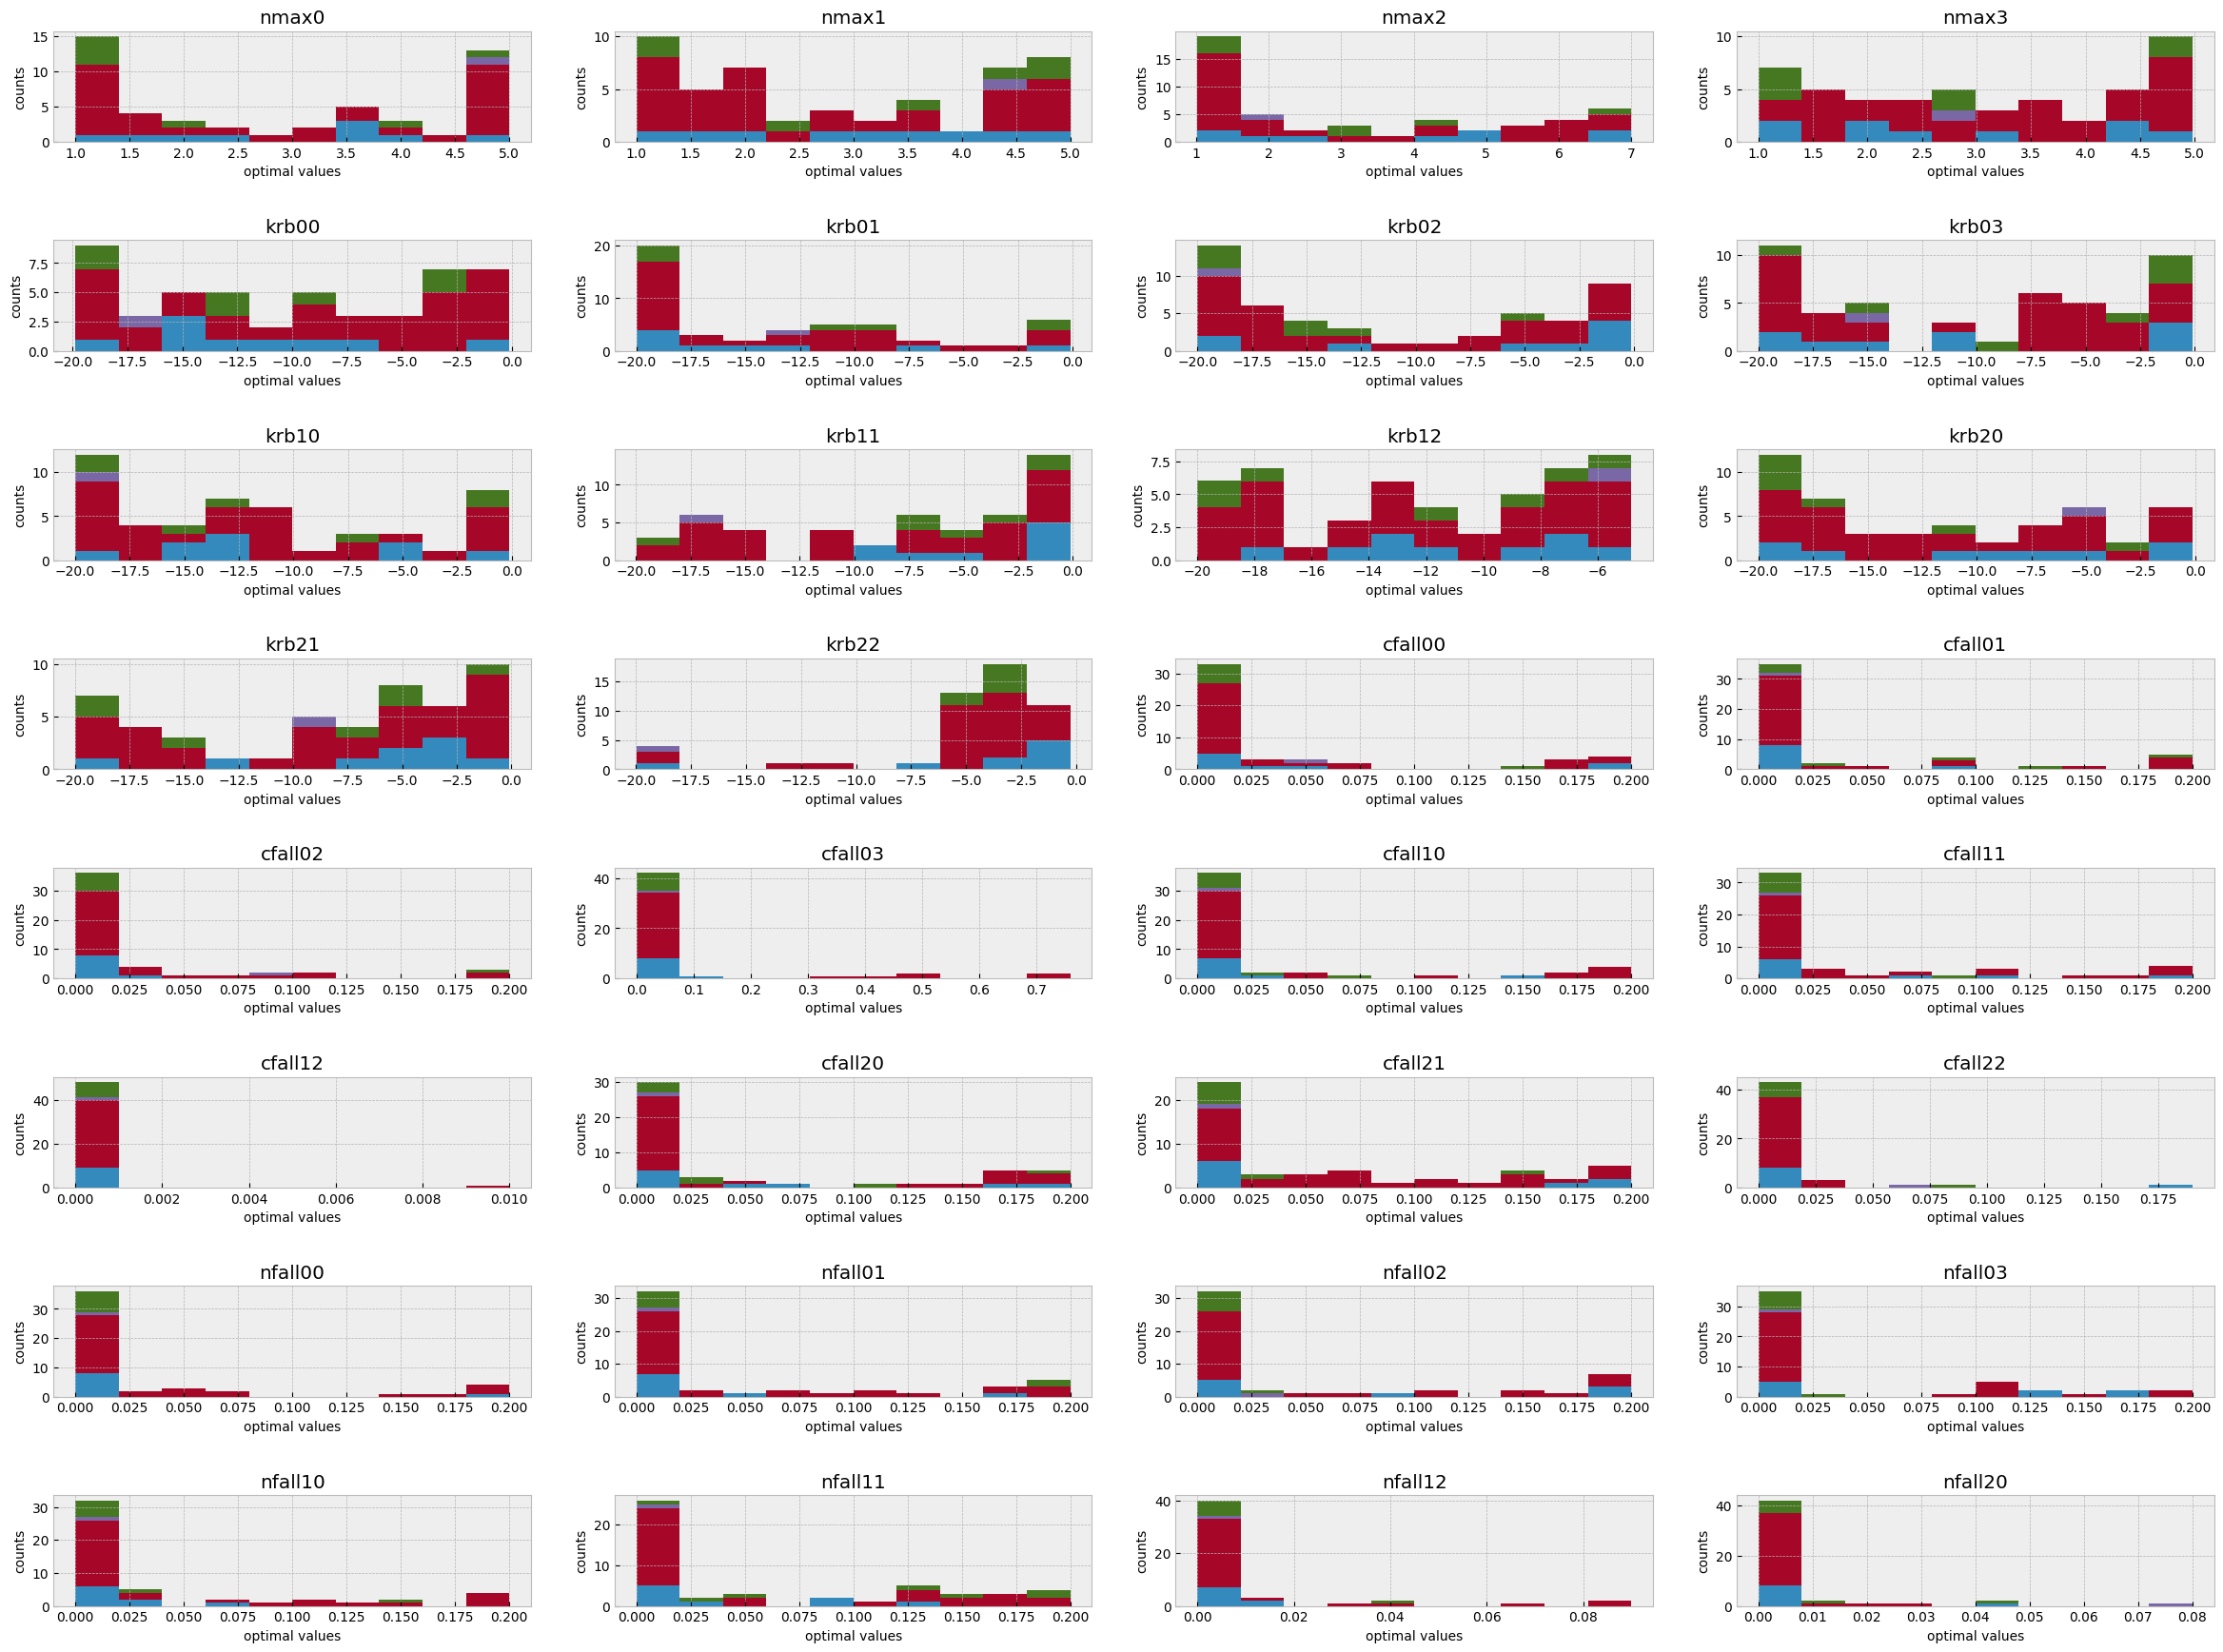

In [39]:
#plot errors
err=ut.get_error(path_itr, filenames)
print(err)
ut.plot_err(err)

#Get error clusters 
float_err=[float(x) for x in err]
rounded_err=list(np.round(float_err,7))
y_kmeans,centers=ut.get_err_clusters(float_err)

#Organize parameters values by kmeans clusters
ut.plot_stacked_histograms(mparams,centers, y_kmeans, r=8, y=18, nbins=10, std=0)

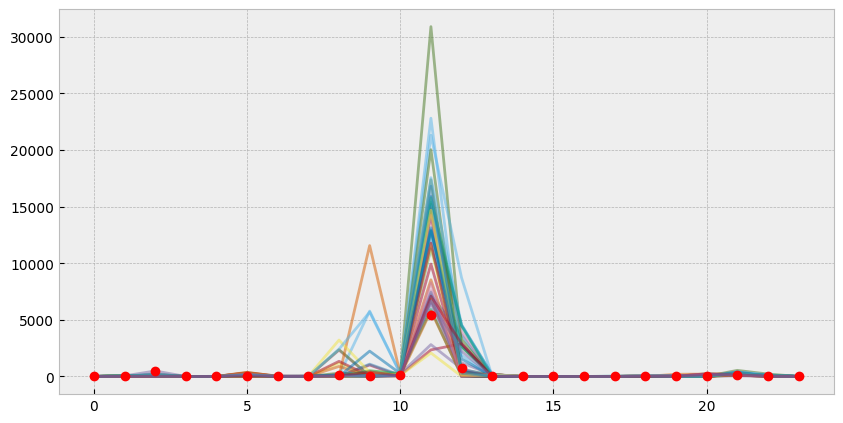

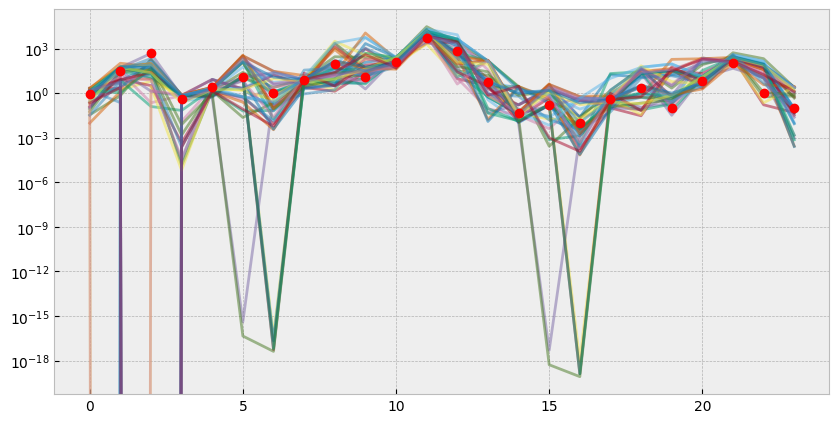

In [41]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

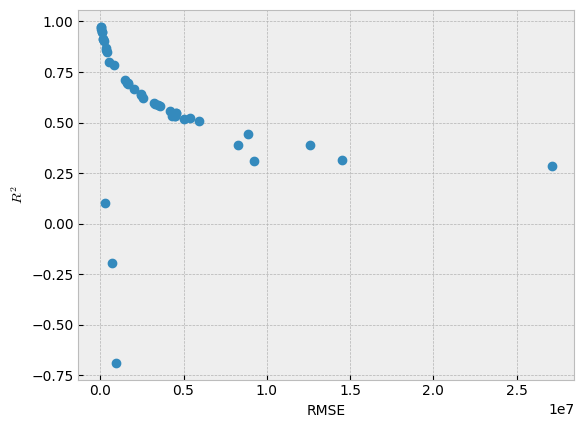

In [42]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)
plt.plot(rmse,r2,'o'), plt.xlabel('RMSE'), plt.ylabel('$R^2$');

/tmp/ipykernel_21374/573042984.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


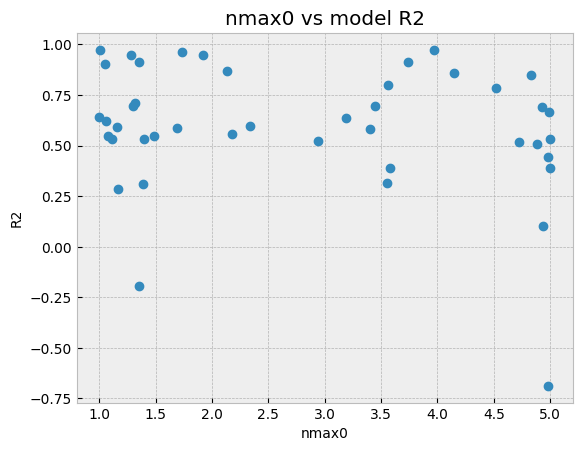

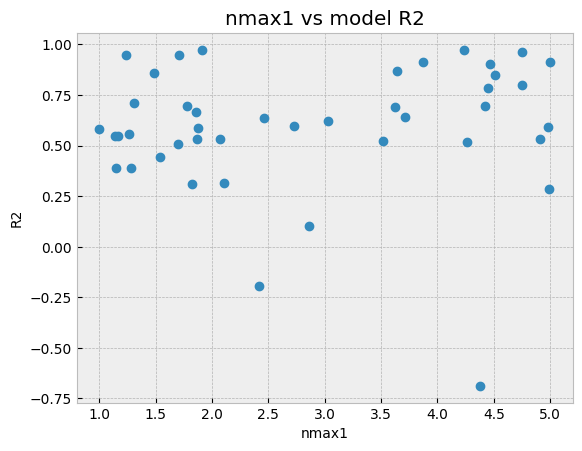

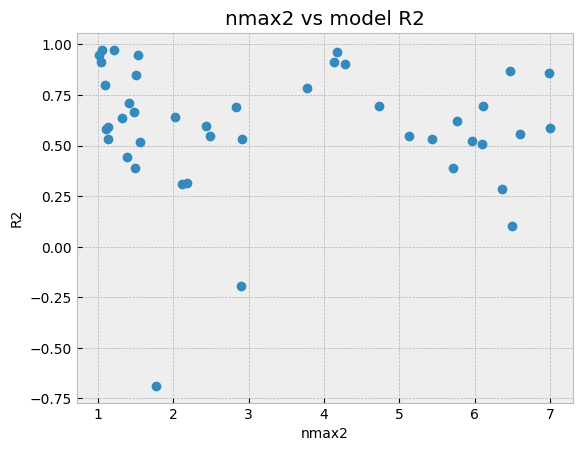

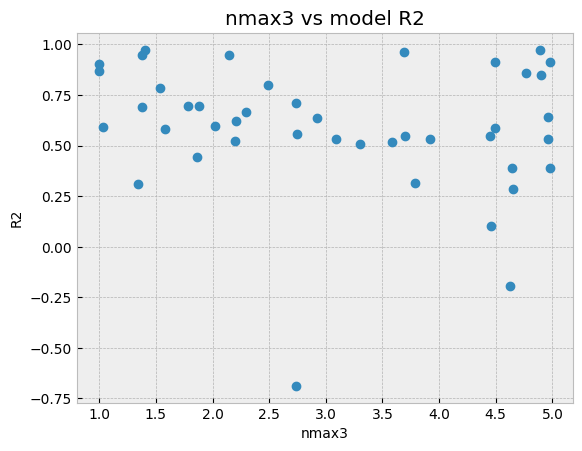

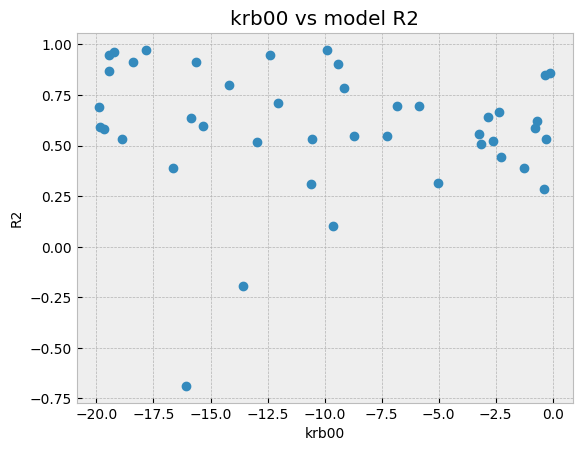

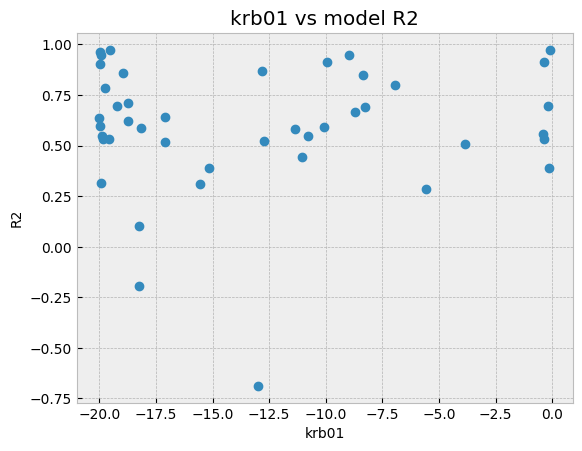

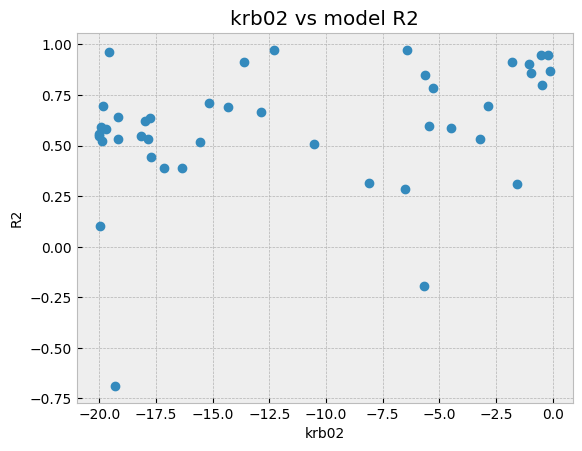

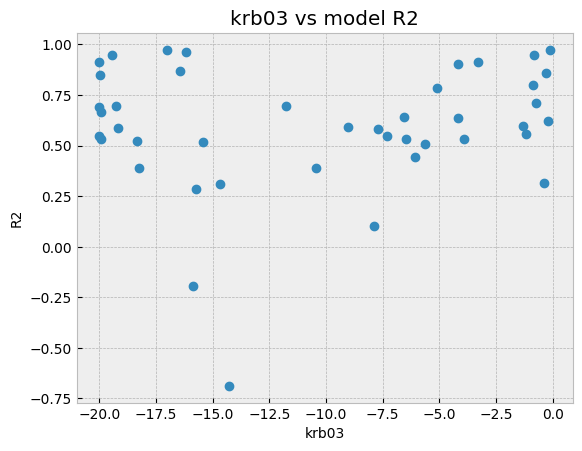

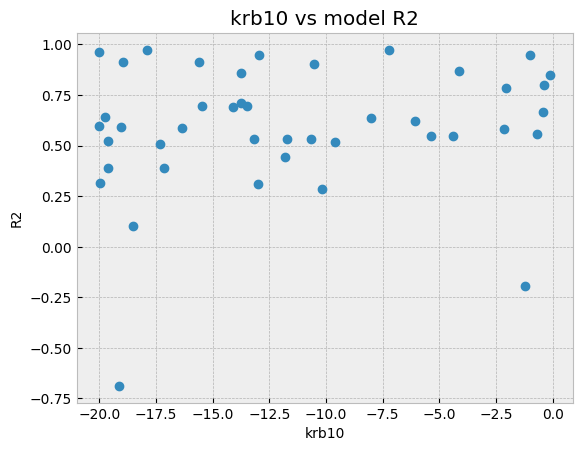

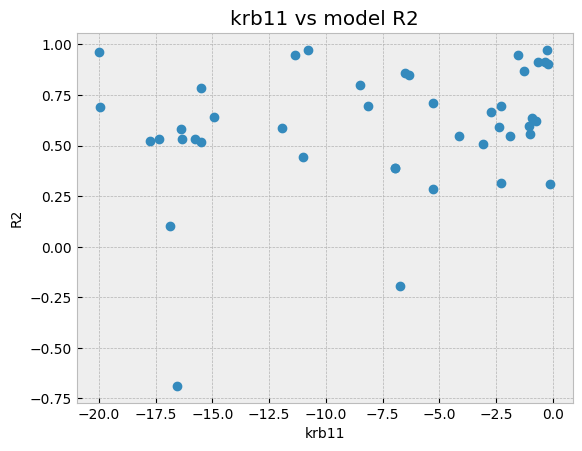

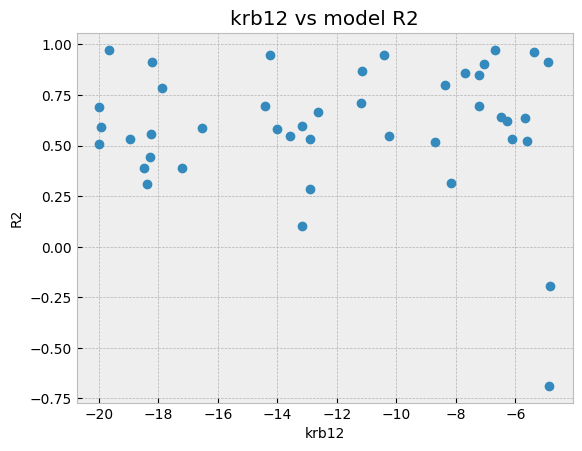

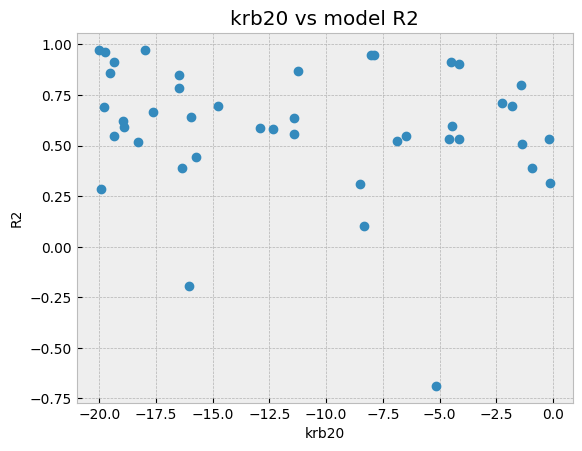

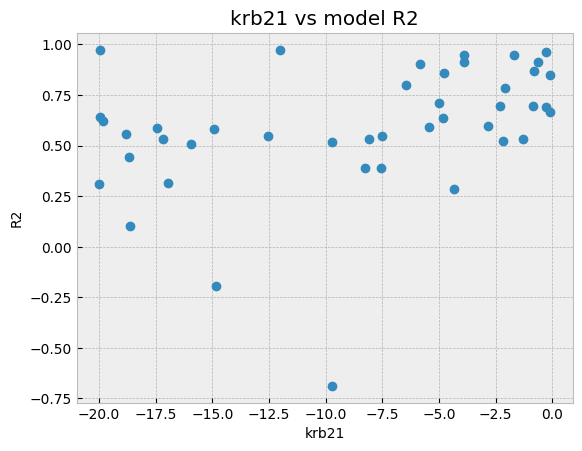

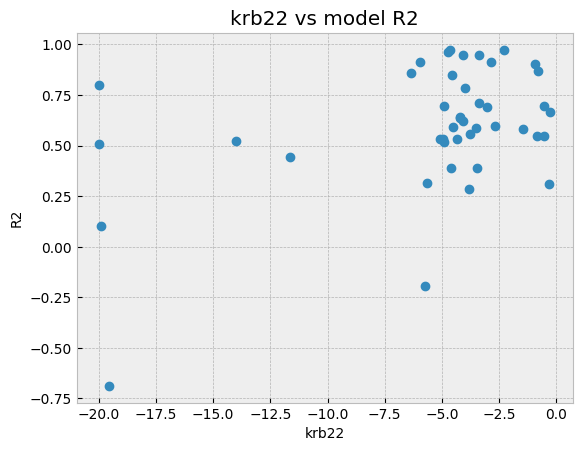

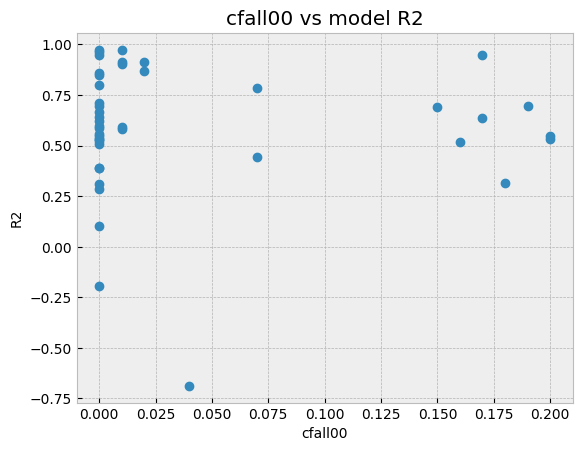

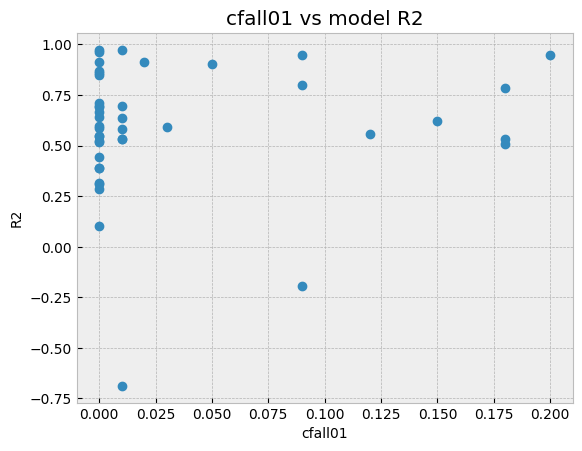

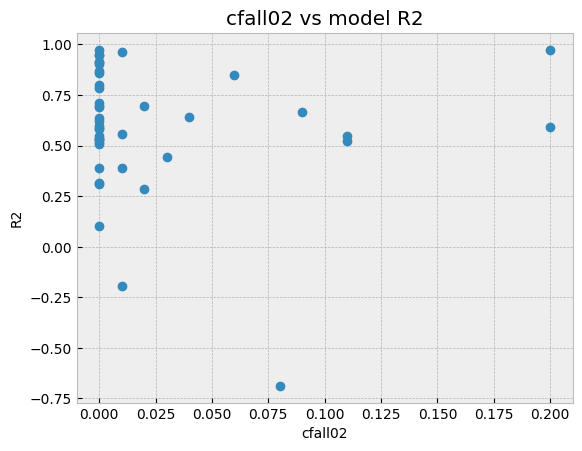

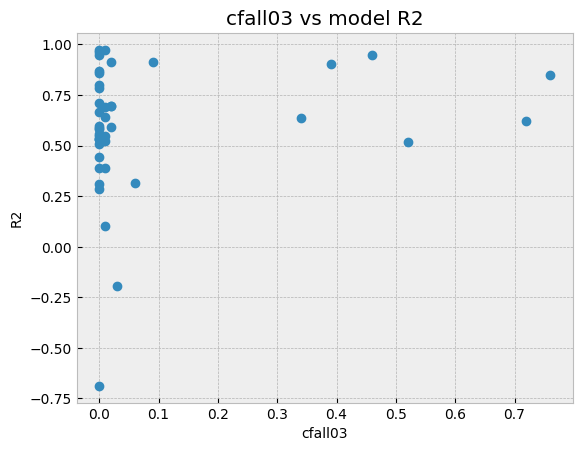

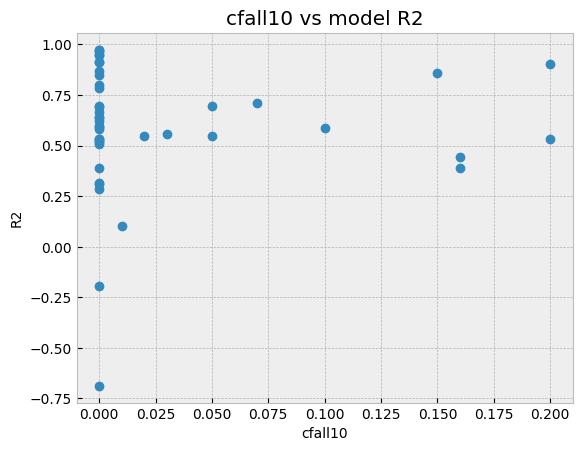

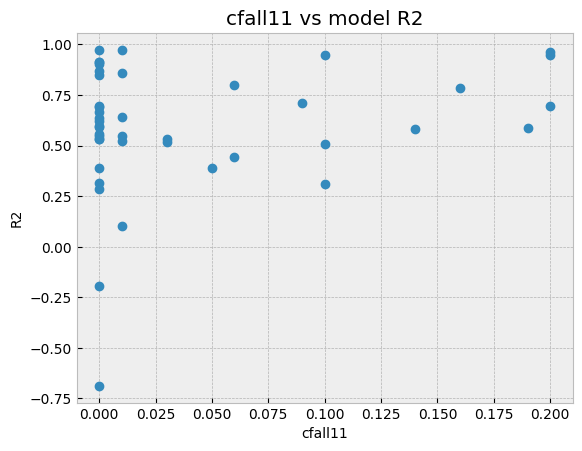

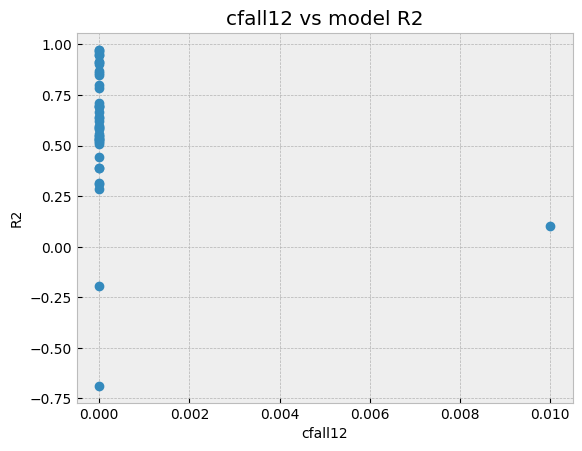

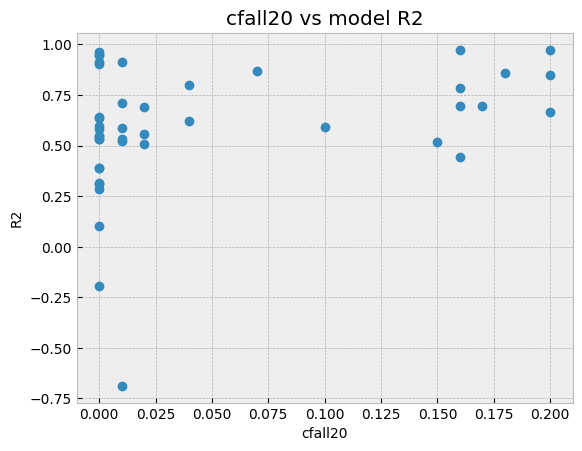

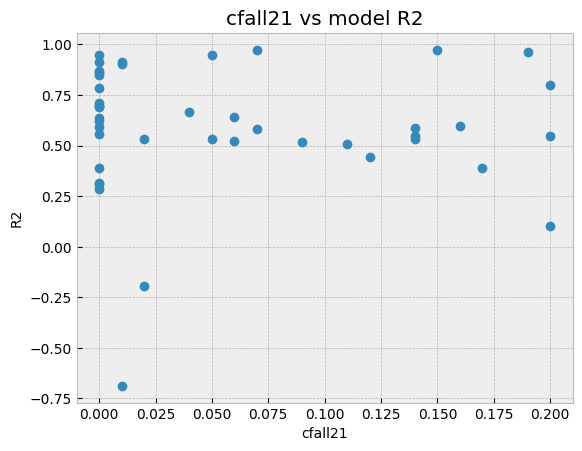

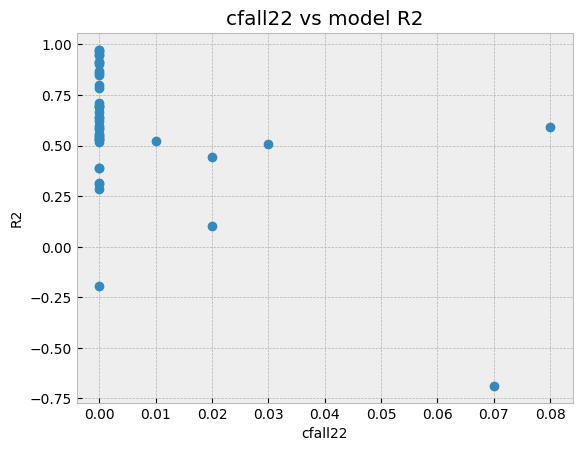

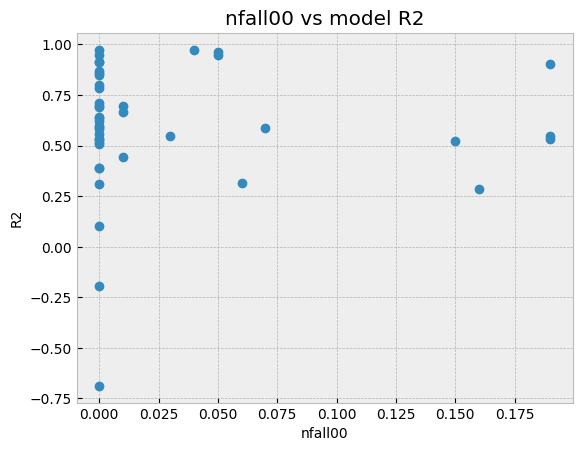

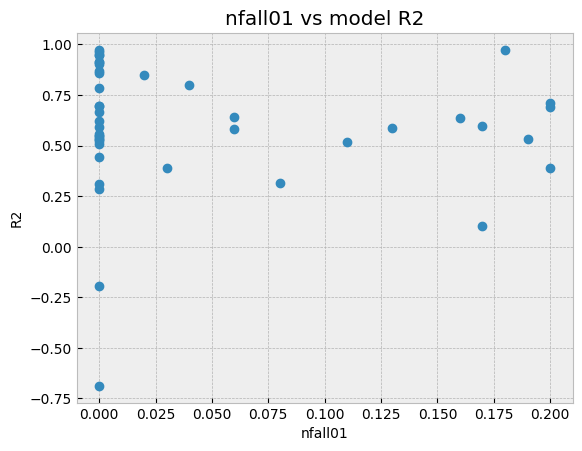

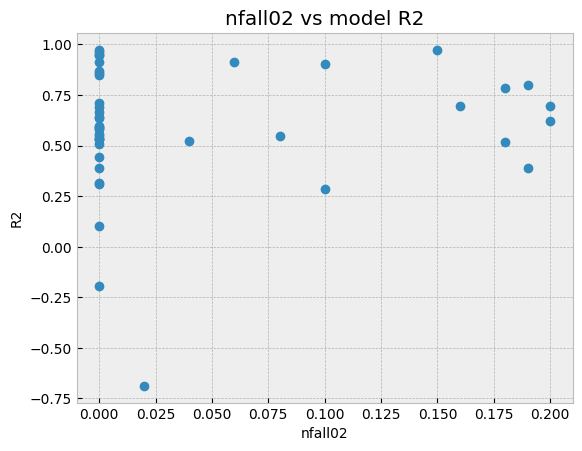

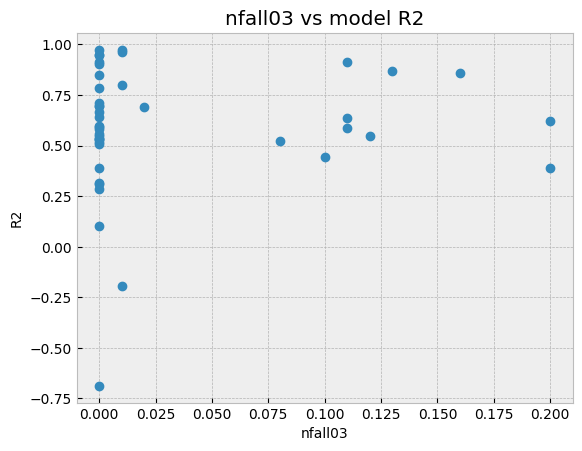

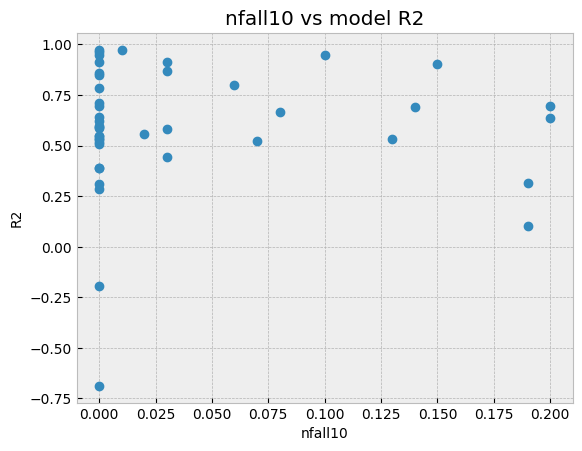

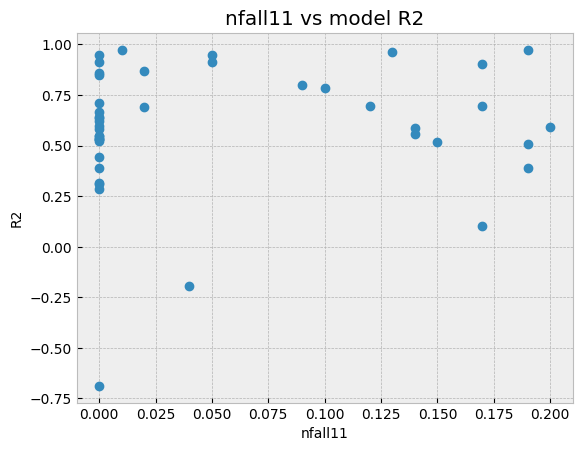

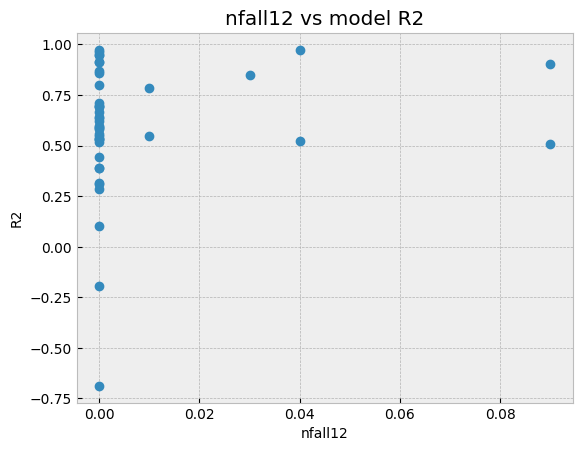

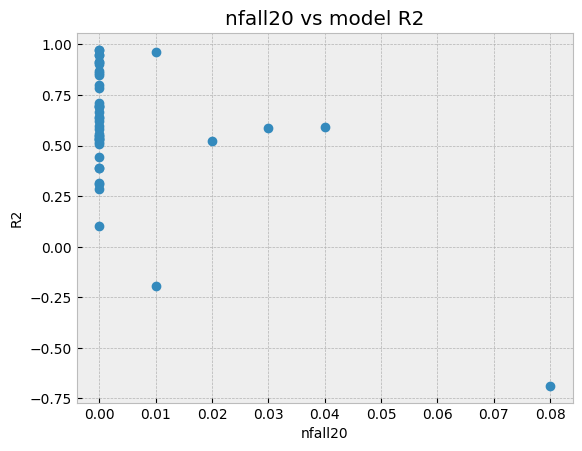

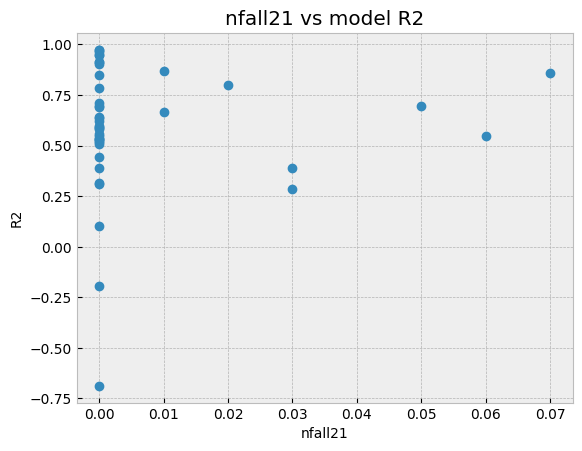

In [43]:
i=0
for item in mparams:
    plt.figure()
    plt.plot(df_param.iloc[:,i],r2,'o');
    plt.xlabel(item), plt.ylabel('R2');
    plt.title(item+' vs model R2')
    i=i+1

/home/akabeer/post_processing_git/MADS-TEM-calibration/utils.py:578: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


IndexError: single positional indexer is out-of-bounds

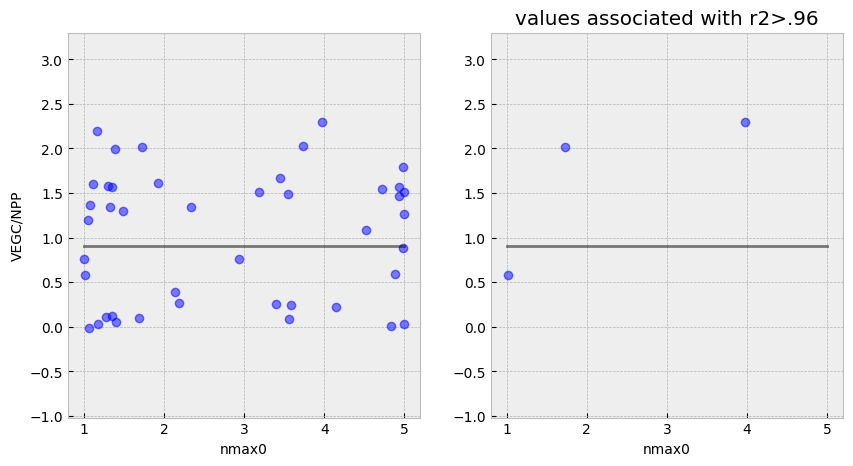

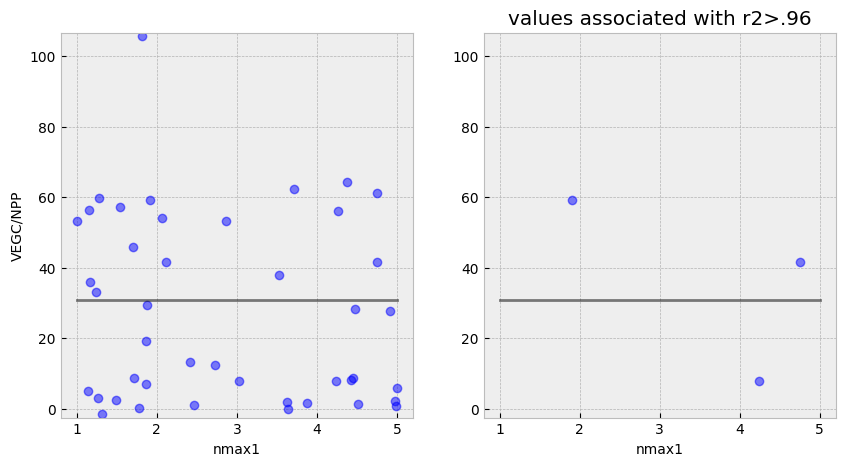

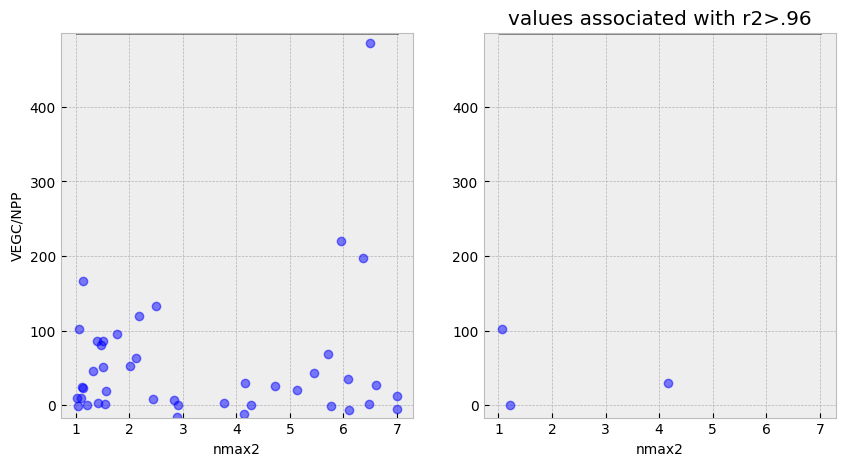

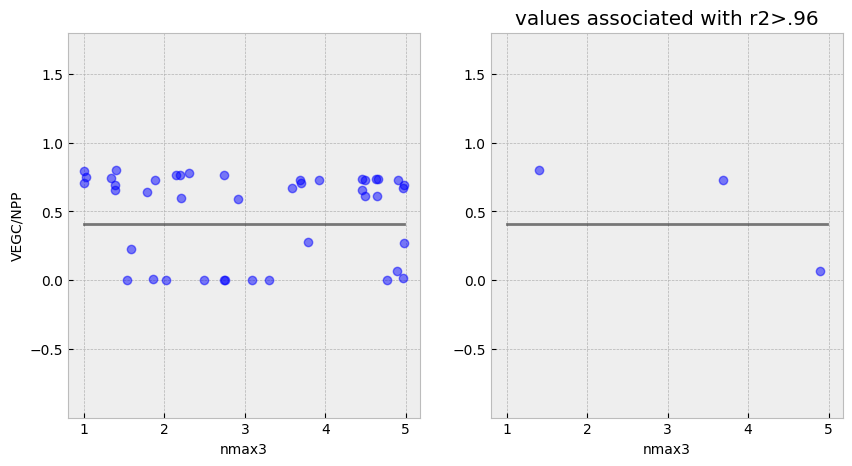

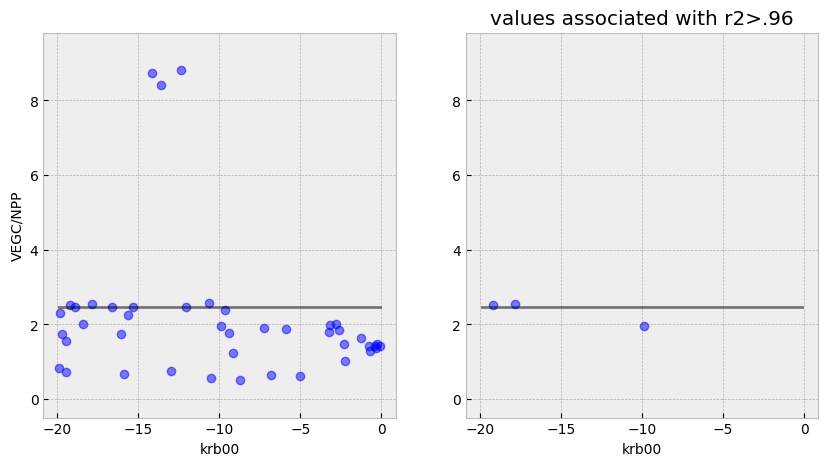

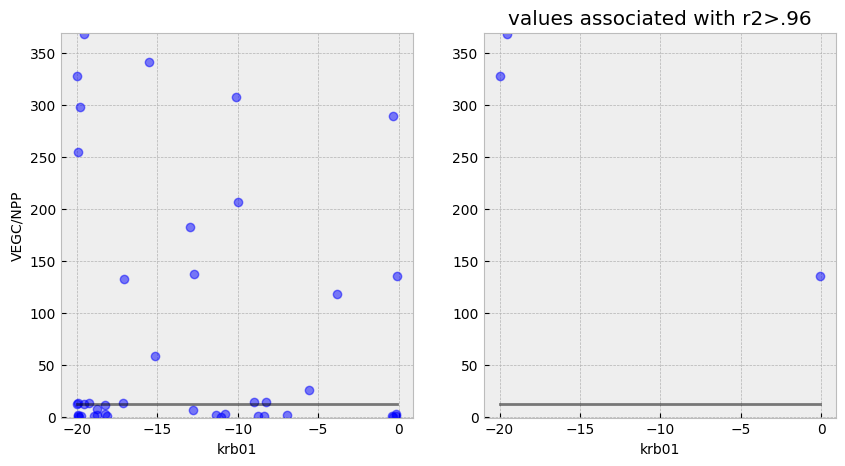

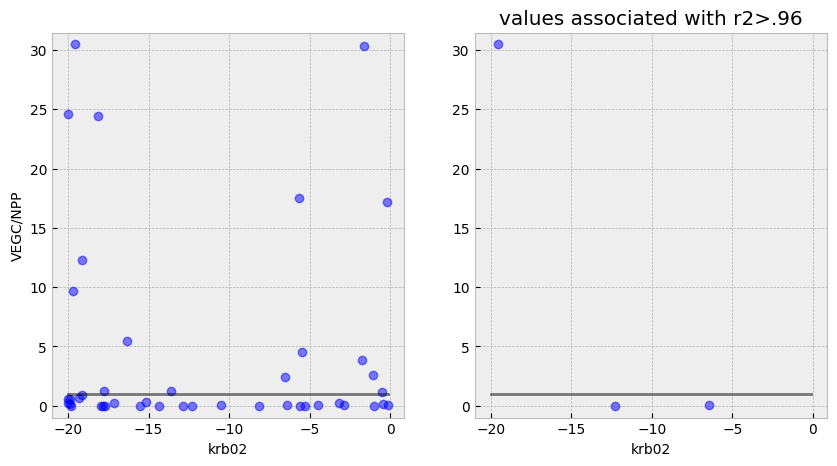

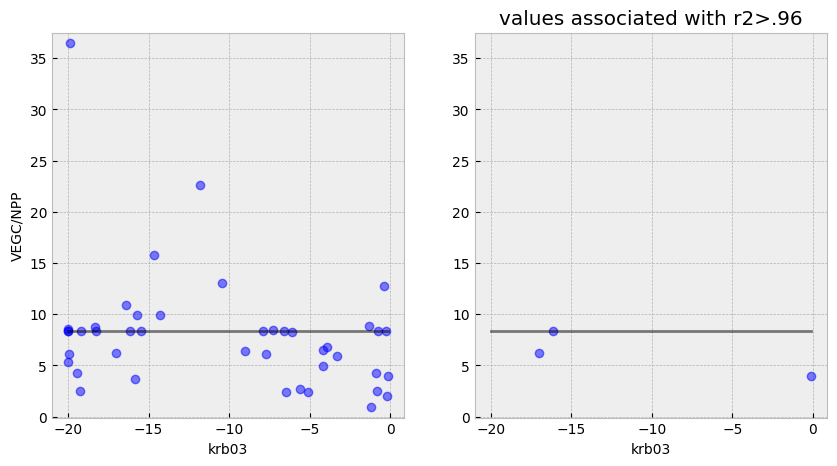

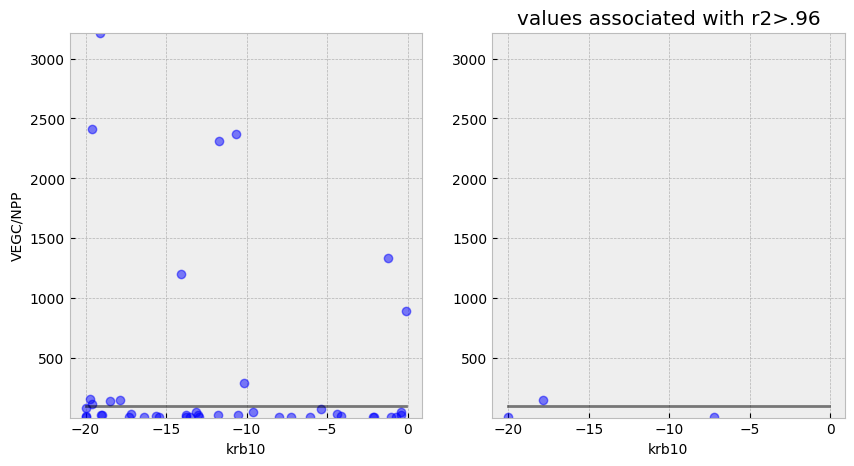

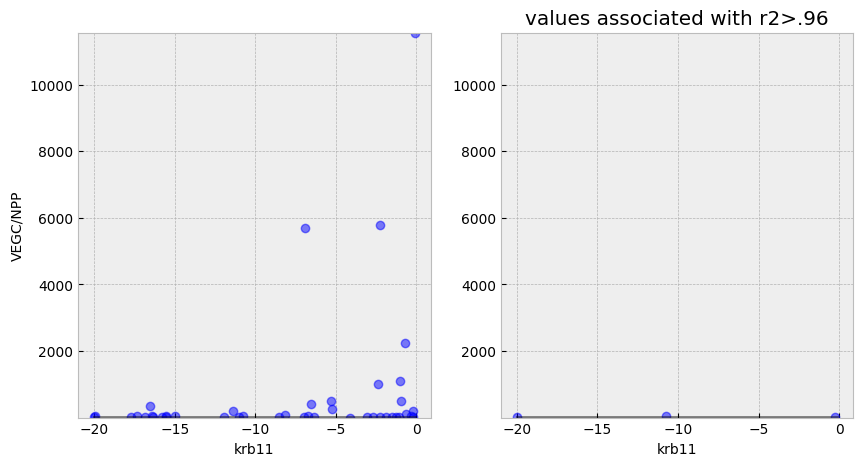

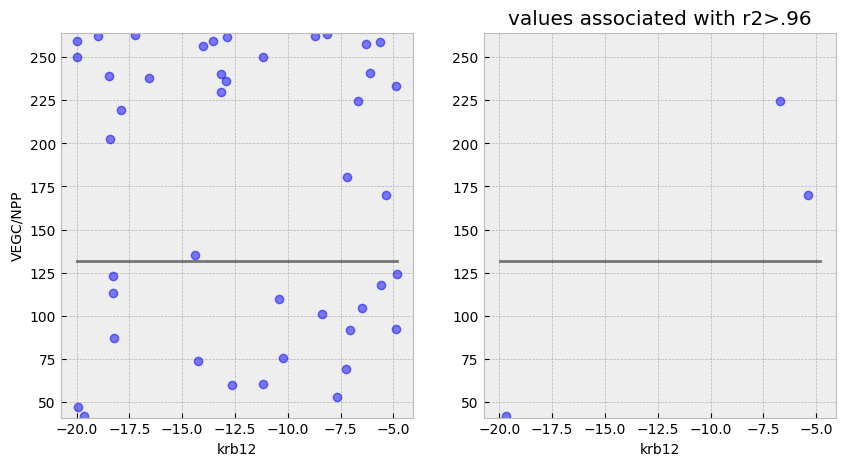

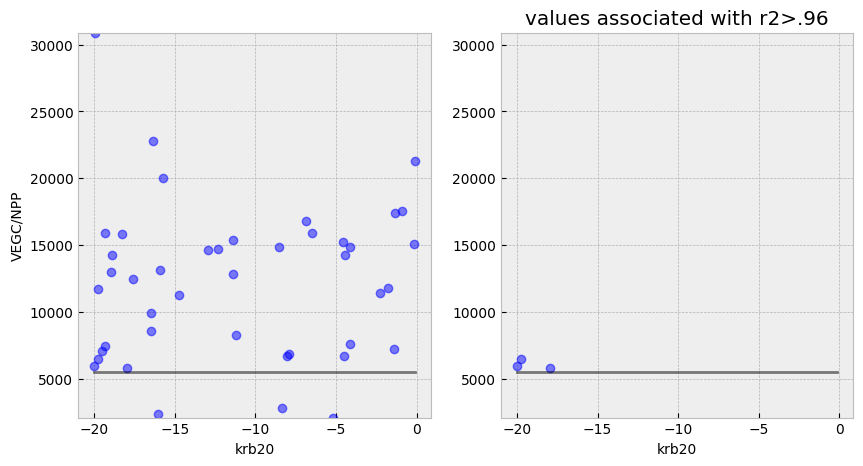

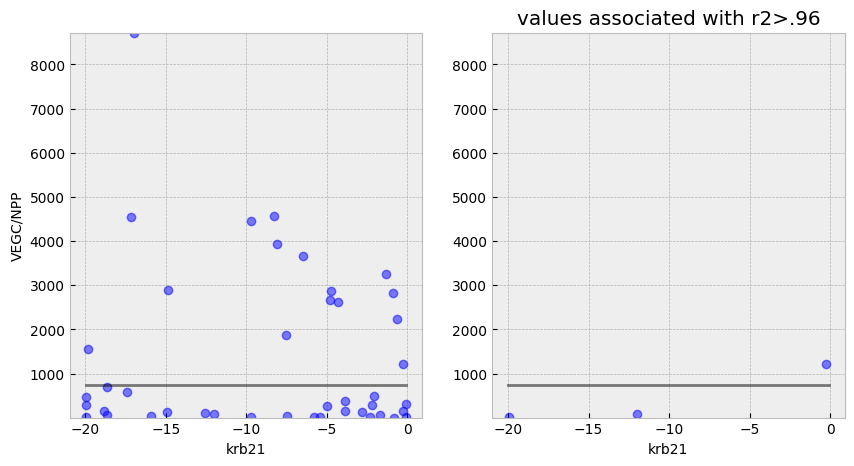

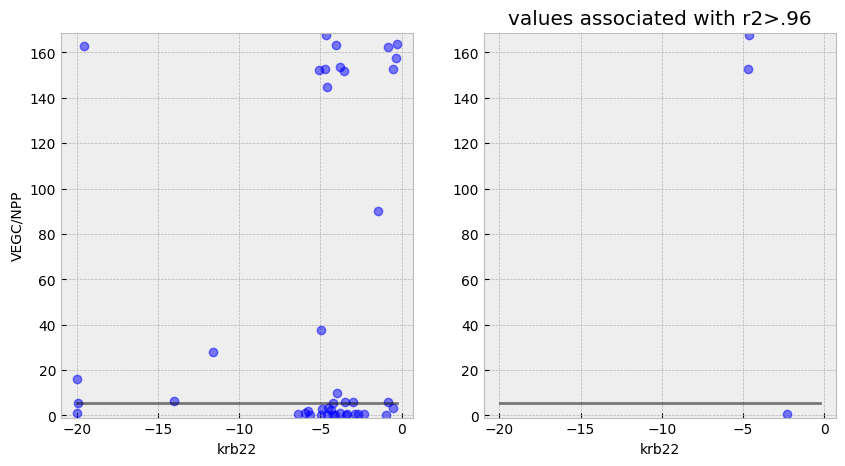

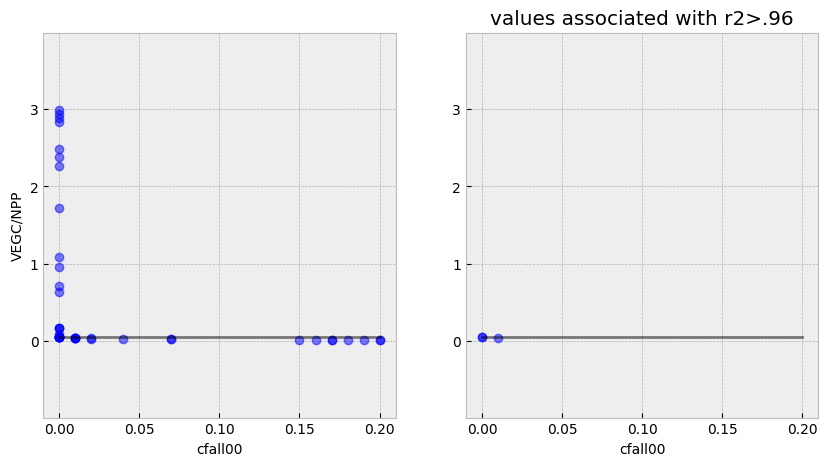

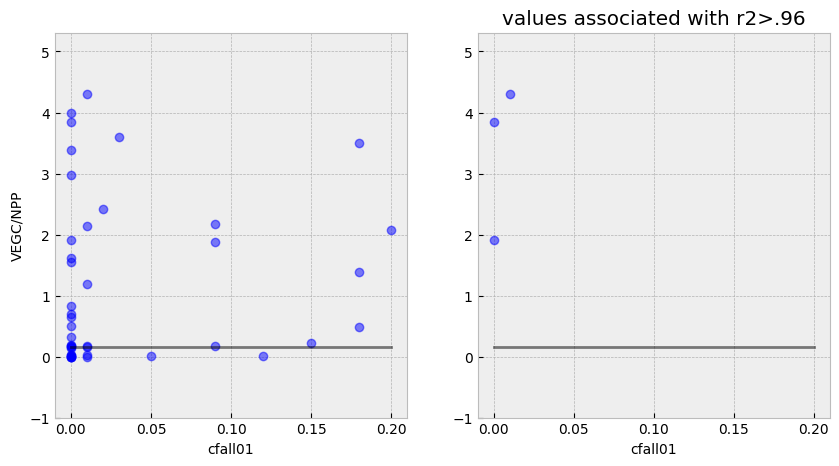

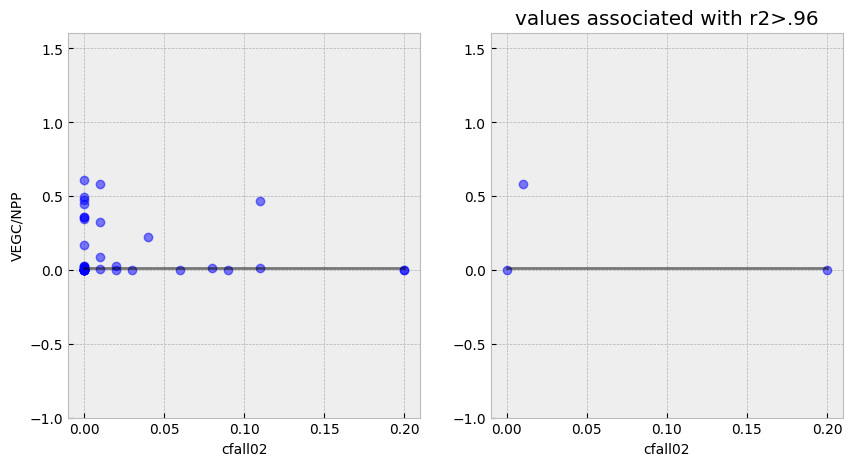

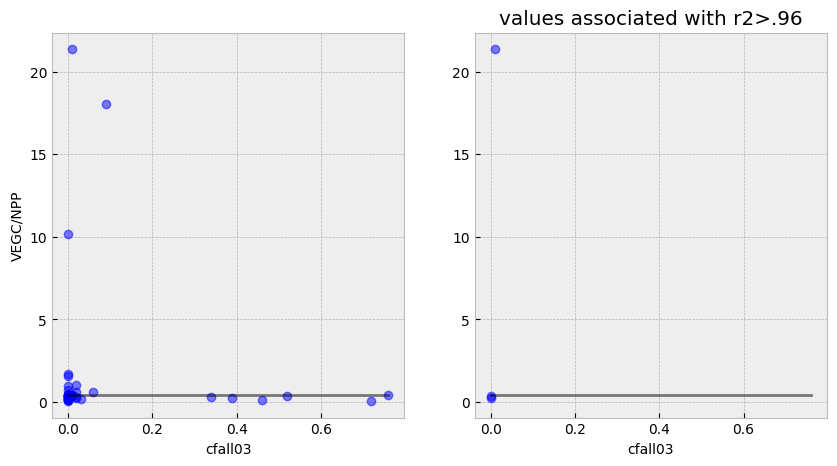

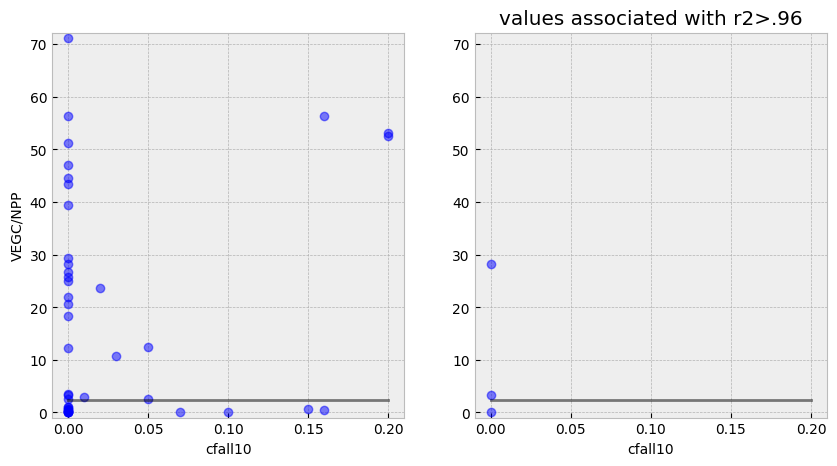

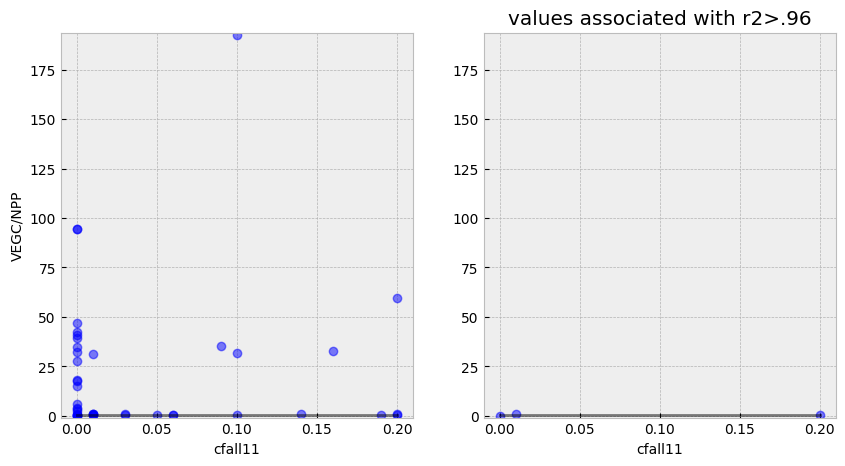

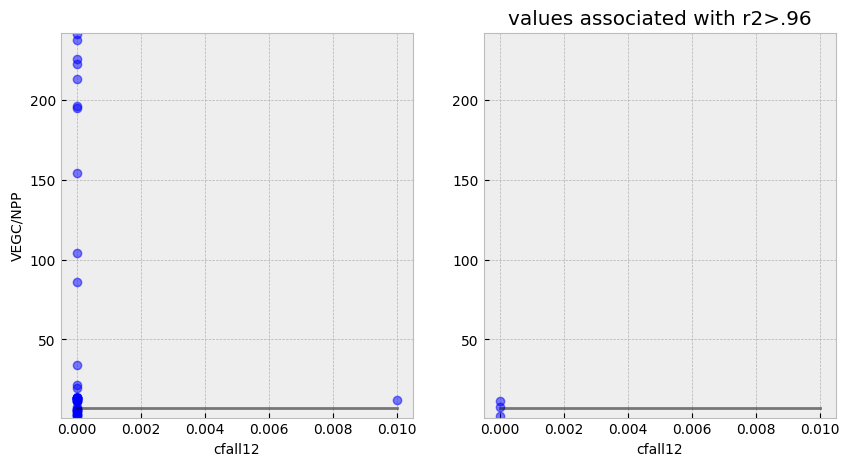

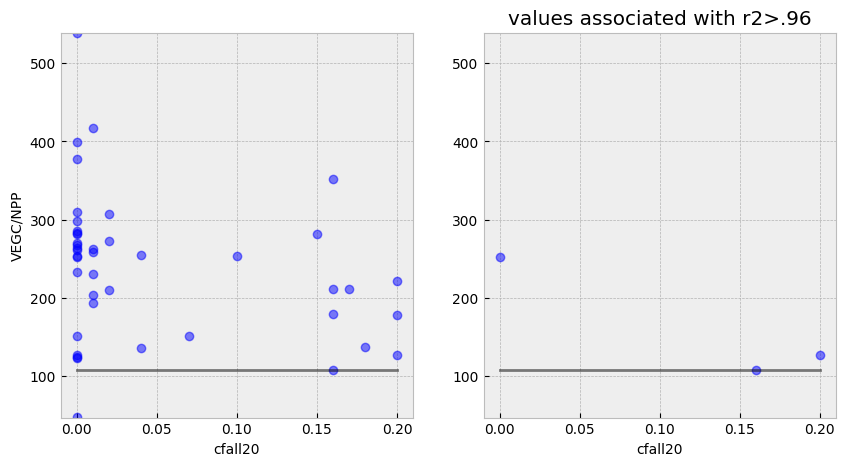

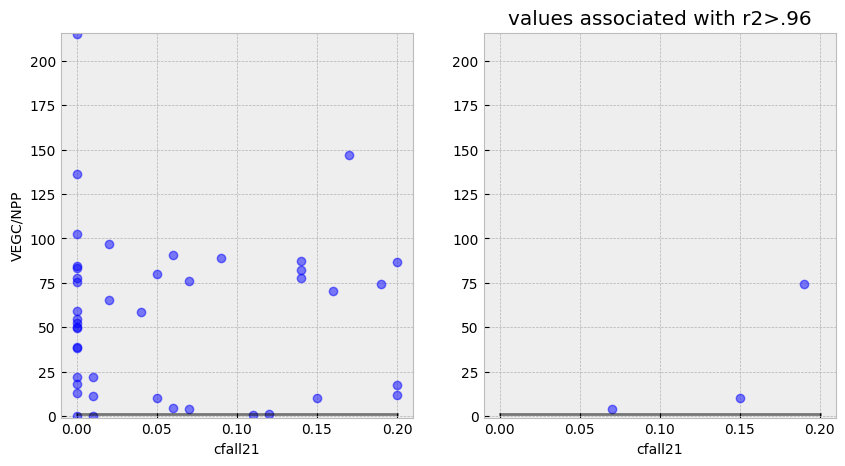

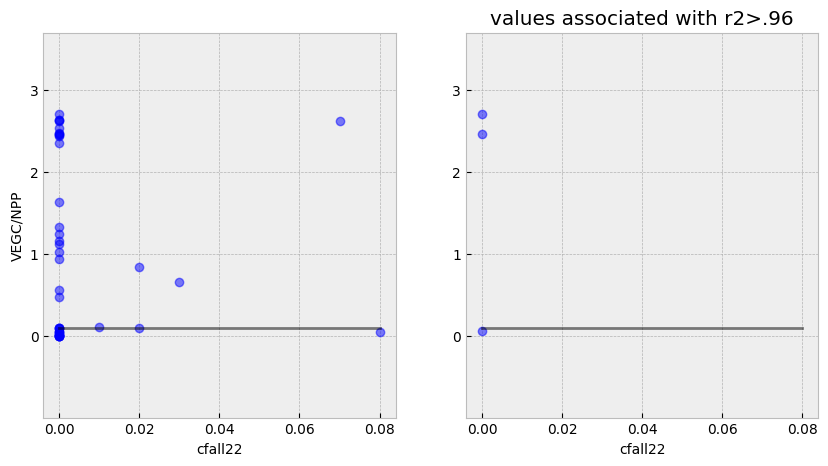

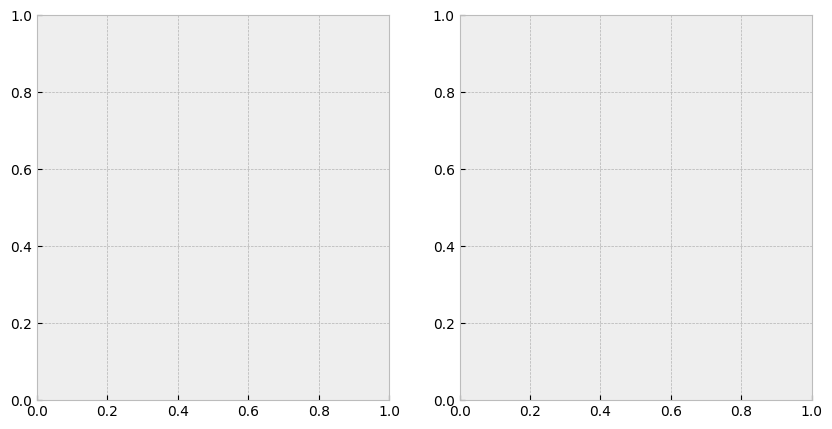

In [45]:
#this assumes a 1-1 relationship between obs and params
i=0
for item in mparams:
    ut.plot_paramsvstarget(df_param,df_model,r2,i,xlabel=item,ylabel='VEGC/NPP')
    i=i+1

# AC-MADS Step2 post SA

test run after looking at importance/corr/relationships from SA

In [13]:
path='../../dvm-dos-tem/mads_calibration/results/'
path_itr='../../dvm-dos-tem/mads_calibration/'
model='out_STEP2-MD3-postSA.csv'
params='param_STEP2-MD3-postSA.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

filenames = ['STEP2-MD3-postSA.finalresults']
targets='NPP/VEGC'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

In [14]:
mparams=ut.get_optimal_sets_of_params(path_itr+filenames[0]) 
for i in filenames[1:]:
    mparams = ut.merge_parameter(mparams, ut.get_optimal_sets_of_params(path_itr+i))

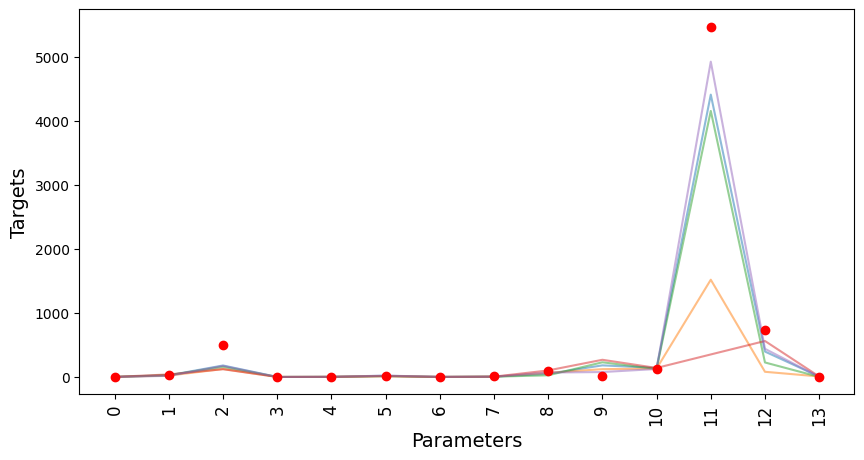

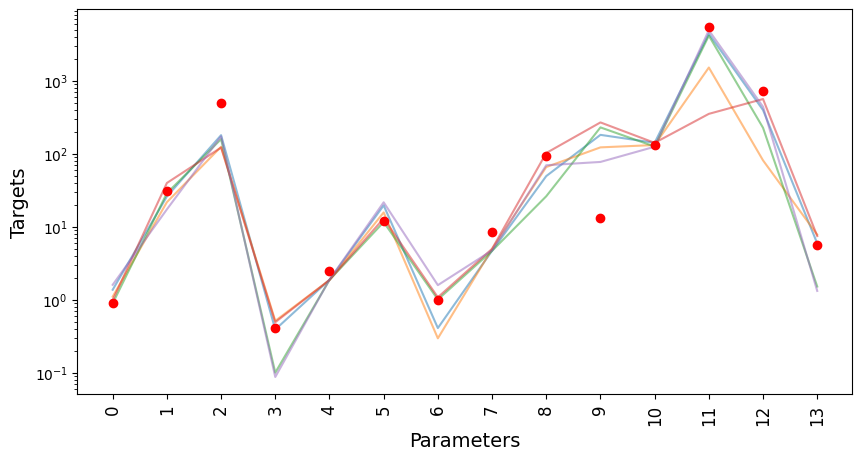

In [ ]:
#plot errors
err=ut.get_error(path_itr, filenames)
print(err)
ut.plot_err(err)

#Get error clusters 
float_err=[float(x) for x in err]
rounded_err=list(np.round(float_err,7))
y_kmeans,centers=ut.get_err_clusters(float_err)

#Organize parameters values by kmeans clusters
ut.plot_stacked_histograms(mparams,centers, y_kmeans, r=8, y=18, nbins=10, std=0)

# AC- MADS Step 3 cfall only post SA

test run after looking at best R2 results from SA analysis
most targets are okay, but massively overestimates target 11 (whereas best R2 SA matched this well)

In [3]:
path='../../dvm-dos-tem/mads_calibration/results/'
path_itr='../../dvm-dos-tem/mads_calibration/'
model='out_STEP3-MD3-CR-cfall_only-postSA.csv'
params='param_STEP3-MD3-CR-cfall_only-postSA.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

filenames = ['STEP3-MD3-CR-cfall_only-postSA.finalresults']
targets='NPP/VEGC'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

In [6]:
mparams=ut.get_optimal_sets_of_params(path_itr+filenames[0]) 
for i in filenames[1:]:
    mparams = ut.merge_parameter(mparams, ut.get_optimal_sets_of_params(path_itr+i))

In [7]:
output_name = ['NPP0','NPP1','NPP2','NPP3',\
                'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
               'VEGC20','VEGC21','VEGC22',\
                'VEGN00','VEGN01','VEGN02','VEGN03','VEGN0','VEGN11','VEGN12',\
               'VEGN20','VEGN21','VEGN22']
df_model.columns = output_name

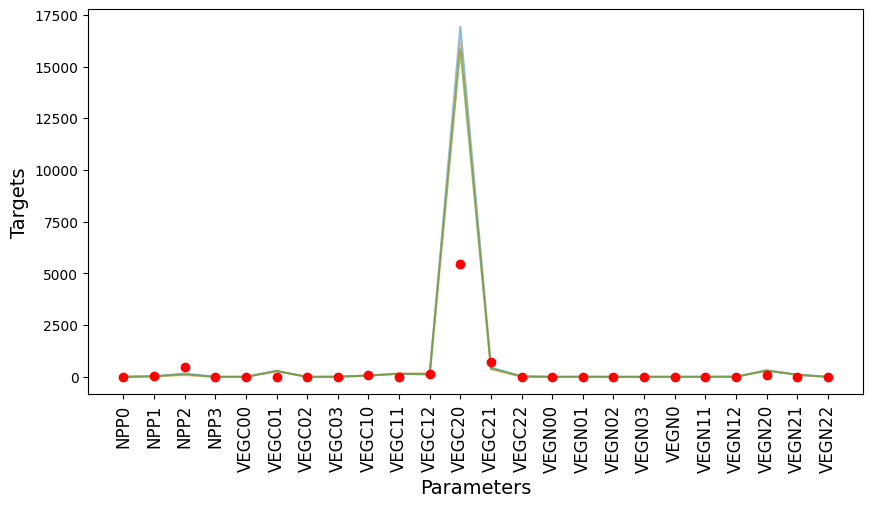

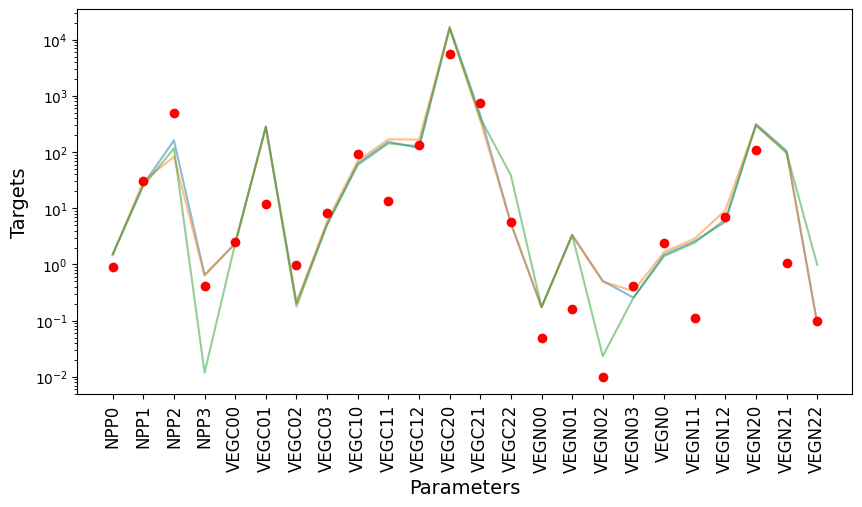

In [8]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

# AC- MADS Step 3 cfall only IG post SA

test run after looking at best R2 results from SA analysis and updating IG to center of those ranges
Used param variances of 40 around those IG
actually gets a good match

In [8]:
path='../../dvm-dos-tem/mads_calibration/results/'
path_itr='../../dvm-dos-tem/mads_calibration/'
model='out_STEP3-MD3-CR-cfall_only_IGrange_postSA.csv'
params='param_STEP3-MD3-CR-cfall_only_IGrange_postSA.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

filenames = ['STEP3-MD3-CR-cfall_only_IGrange_postSA.finalresults']
targets='NPP/VEGC'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

In [6]:
output_name = ['NPP0','NPP1','NPP2','NPP3',\
                'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
               'VEGC20','VEGC21','VEGC22',\
                'VEGN00','VEGN01','VEGN02','VEGN03','VEGN0','VEGN11','VEGN12',\
               'VEGN20','VEGN21','VEGN22']
df_model.columns = output_name

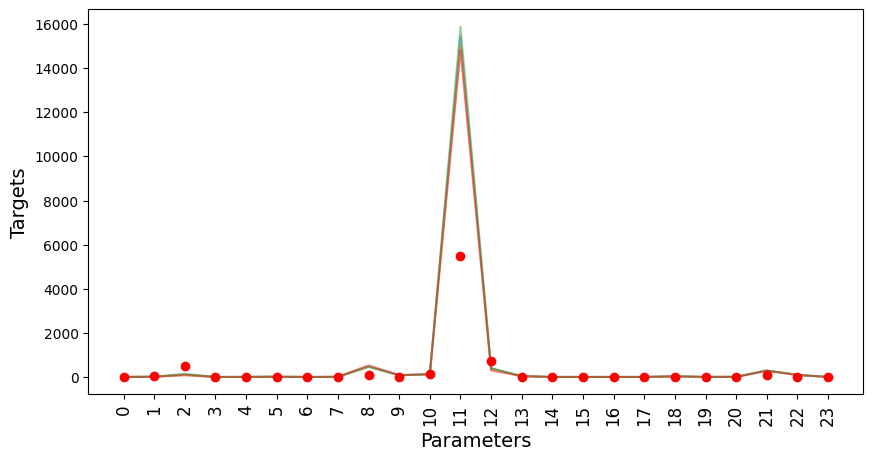

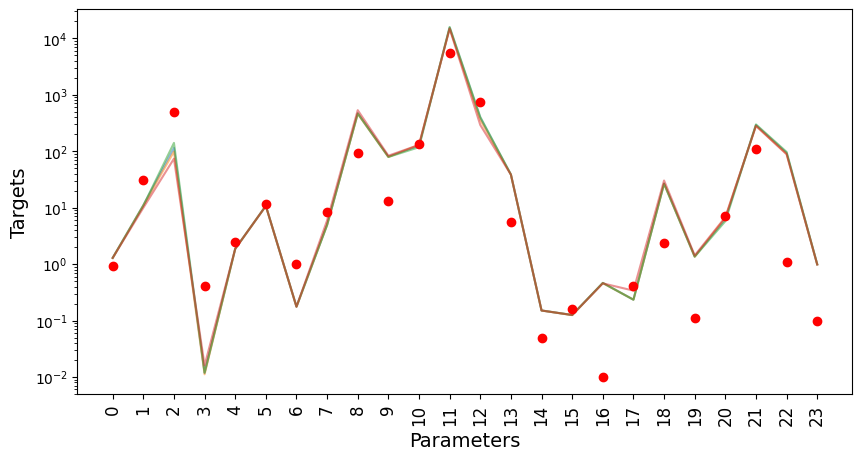

In [9]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)